#Assignment 3: Model Interpretability
Author: Aashay Pawar

NUID: 002134382

Interpret your models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

#About the Dataset

The dataset contains various details about vehicles, including car name, price in rupees, kilometers driven, fuel type, transmission type, ownership status, manufacture year, engine specifications, and number of seats. It is an open dataset that can be accessed on Kaggle, and a snapshot of the same dataset is also available on my GitHub page. The file is in CSV format, which makes it easy to import and analyze using various software tools.

Kaggle: https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction

Github: https://github.com/pawar-aa/NFO6105-33201-Data-Sci-Eng-Methods

#Abstract
This code is for predicting the price of used cars using a dataset containing information such as car name, fuel type, kilometers driven, transmission, number of owners, seats, engine capacity, and year of manufacture. The dataset is first cleaned and preprocessed, and then two models are trained and evaluated: a linear regression model and a random forest regression model. The models are evaluated using mean absolute error, and the feature importance is visualized using a horizontal bar chart. The code uses pandas, numpy, sklearn, statsmodels, and matplotlib libraries.

#Index (What happened in the below code?)

1.   All libraries are imported, missing modules were installed
2.   Dataset was loaded in pandas dataframe
2.   Data cleaning and prosecc was done
3.   Data was split into training and testing sets
4.   Task 1: Fit a linear model and interpret the regression coefficients
5.   Task 2: Fit a tree-based model and interpret the nodes
6.   Task 3: Use auto ml to find the best model
7.   Task 4: Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.





#What is Model Interpretability?
Model interpretability refers to the ability to understand and explain the decisions or predictions made by a machine learning model. In other words, it is the degree to which a model's behavior or outputs can be explained in human terms.

Interpretability is important because it helps build trust in machine learning models, especially in high-stakes applications such as healthcare or finance. An interpretable model can help stakeholders understand how the model works, why it makes certain decisions, and how to improve it.

There are various techniques and methods for improving model interpretability, such as feature importance analysis and decision tree visualization. These techniques aim to extract meaningful insights from the model and present them in a way that is easily understandable for humans.

#What is SHAP analysis?
SHAP (SHapley Additive exPlanations) analysis is a method for explaining the predictions of machine learning models. It provides a way to attribute the contribution of each feature or input variable to the final output of the model.

SHAP analysis is based on the concept of Shapley values from cooperative game theory. In cooperative game theory, Shapley values are used to allocate the payoff of a game to each player based on their contribution to the game. In the context of machine learning models, the game is the prediction task, and the players are the input features. The SHAP values represent the contribution of each feature to the prediction, taking into account the interactions between the features.

The SHAP analysis algorithm computes the SHAP values for each input feature by considering all possible combinations of features and their contributions to the prediction. The SHAP values can be used to explain the predictions of any machine learning model, including black-box models such as deep neural networks.

SHAP analysis can be used to answer questions such as "Why did the model make this prediction?" or "Which features were most important for the prediction?" This information can be useful for improving the model's performance, detecting bias, and building trust in the model's predictions.

#Importing Libraries

In [150]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
pip install sklearn_pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [152]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [153]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Loading the dataset

The code below loads the dataset from a CSV file stored in a GitHub repository into a pandas DataFrame named df. The pd.read_csv function is used to read the CSV file and create the DataFrame. The df.info() function is used to print information about the DataFrame, such as the number of rows and columns, data types of each column, and the number of non-null values in each column.

In [154]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/pawar-aa/NFO6105-33201-Data-Sci-Eng-Methods/main/car_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


The below code block is used to clean up the 'car_prices_in_rupee' column of the DataFrame. It uses a for loop to iterate over each value in the column, checks if the value contains the string 'Lakh' or 'Crore', and removes these strings and converts the value to an integer. The updated values are then stored back into the DataFrame using the df.at[i, 'car_prices_in_rupee'] function.

Further the code cleans the 'car_prices_in_rupee' column. The first line replaces any commas in the column with an empty string. The second line converts the column to numeric values, and any non-numeric values are replaced with NaN (Not a Number) using the errors='coerce' parameter. The third line drops any rows that contain NaN values in the 'car_prices_in_rupee' column. Finally, the fourth line converts the 'car_prices_in_rupee' column to 64-bit integers.

In [155]:
# CAR PRICE
# iterate over each value in the 'car_prices_in_rupee' column
for i, value in enumerate(df['car_prices_in_rupee']):
        # check if the value contains 'Lakh'
        if 'Lakh' in value:
            # replace 'Lakh' with an empty string
            value = value.replace('Lakh', '')
            # convert the value to a float
            value = int(float(value) * 100000)
        # check if the value contains 'Crore'
        elif 'Crore' in value:
            # replace 'Crore' with an empty string
            value = value.replace('Crore', '')
            # convert the value to a float
            value = int(float(value) * 10000000)
        # update the value in the dataframe
        df.at[i, 'car_prices_in_rupee'] = value
        
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].str.replace(',', '')
df['car_prices_in_rupee'] = pd.to_numeric(df['car_prices_in_rupee'], errors='coerce')
df.dropna(subset=['car_prices_in_rupee'], inplace=True)
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].astype('int64')

# KILOMETERS DRIVEN    
df['kms_driven'] = df['kms_driven'].str.replace('kms', '').str.replace(',', '').astype(int)

# OWNERSHIP TYPE    
df['ownership'] = df['ownership'].replace({'1st Owner': 1, '2nd Owner': 2,'3rd Owner': 3, '4th Owner': 4, '5th Owner': 5, '0th Owner': 0}).astype(int)

# ENGINE CAPACITY IN CC
df['engine'] = df['engine'].str.replace('cc', '').astype(int)

#calculating car age
df['age']=2023- df['manufacture']

#dropping unnecessary feature
df.drop(labels= ['Unnamed: 0'], axis= 1, inplace= True)          
df.drop(labels= ['car_name'], axis= 1, inplace= True)
df.drop(labels= ['manufacture'], axis= 1, inplace= True) 

The rest of code is cleaning the data in the 'kms_driven' column. It removes the string 'kms' from the entries, removes commas (if any) in the numbers, and converts the data type to integer.

The next lines cleans the data in the 'ownership' column. It replaces the strings '1st Owner', '2nd Owner', etc. with integers 1, 2, etc. and converts the data type to integer.

Next the code is cleaning the data in the 'engine' column. It removes the string 'cc' from the entries and converts the data type to integer.

Further the code calculates the age of each car by subtracting the year of manufacture from the current year (2023).

At last code drops three columns from the DataFrame. The 'Unnamed: 0' column appears to be an index column, so it is removed. The 'car_name' and 'manufacture' columns are also dropped as they may not be relevant for the analysis or modeling tasks at hand. The inplace parameter is set to True to modify the original DataFrame df directly.

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 238 to 5439
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_prices_in_rupee  123 non-null    int64 
 1   kms_driven           123 non-null    int64 
 2   fuel_type            123 non-null    object
 3   transmission         123 non-null    object
 4   ownership            123 non-null    int64 
 5   engine               123 non-null    int64 
 6   Seats                123 non-null    object
 7   age                  123 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 8.6+ KB


In [157]:
# Checking if the dataset is as desired
df.head()

,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,age
238,99999,80000,Petrol,Manual,3,1298,5 Seats,16
243,55000,90000,Petrol,Manual,3,993,5 Seats,21
342,84778,70229,Petrol,Manual,4,796,5 Seats,15
675,59000,60000,Petrol,Manual,1,1497,5 Seats,16
734,90000,80000,Petrol,Manual,2,2993,5 Seats,15


In [158]:
# Checking if the dataset has no null values
df.isnull().sum()

car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
engine                 0
Seats                  0
age                    0
dtype: int64

#Data transforming, Feature creation and Analysis

This code performs feature engineering on a given dataset df by normalizing numeric features and one-hot encoding categorical features using Scikit-Learn's MinMaxScaler and Pandas' get_dummies function, respectively. Here's what each line of code does:

1.  from sklearn.preprocessing import MinMaxScaler: Import MinMaxScaler from Scikit-Learn's preprocessing module.

2.  numeric_features = ['kms_driven', 'engine', 'age', 'car_prices_in_rupee']: Create a list of column names of numeric features that need to be normalized.

3.  categorical_features = ['fuel_type', 'transmission', 'ownership', 'Seats']: Create a list of column names of categorical features that need to be one-hot encoded.

4.  scaler = MinMaxScaler(): Instantiate a MinMaxScaler object.

5.  df[numeric_features] = scaler.fit_transform(df[numeric_features]): Normalize the values of the numeric features in the dataset by fitting the scaler object on the numeric features and then transforming them.

6.  data = pd.get_dummies(df, columns=categorical_features): Perform one-hot encoding on the categorical features in the dataset using Pandas' get_dummies function.

7.  data.head(): Show the first five rows of the new dataset data that has normalized numeric features and one-hot encoded categorical features.

In [159]:
from sklearn.preprocessing import MinMaxScaler

# Separate numeric and categorical features
numeric_features = ['kms_driven', 'engine', 'age', 'car_prices_in_rupee']
categorical_features = ['fuel_type', 'transmission', 'ownership', 'Seats']

# Normalize numeric features
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# One-hot encode categorical features
data = pd.get_dummies(df, columns=categorical_features)

data.head()

,car_prices_in_rupee,kms_driven,engine,age,fuel_type_Diesel,fuel_type_Lpg,fuel_type_Petrol,transmission_Automatic,transmission_Manual,ownership_1,ownership_2,ownership_3,ownership_4,ownership_5,Seats_4 Seats,Seats_5 Seats,Seats_7 Seats,Seats_8 Seats
238,1.000000,0.278402,0.228493,0.470588,0,0,1,0,1,0,0,1,0,0,0,1,0,0
243,0.307697,0.315741,0.089668,0.764706,0,0,1,0,1,0,0,1,0,0,0,1,0,0
342,0.765827,0.241918,0.000000,0.411765,0,0,1,0,1,0,0,0,1,0,0,1,0,0
675,0.369236,0.203724,0.319071,0.470588,0,0,1,0,1,1,0,0,0,0,0,1,0,0
734,0.846167,0.278402,1.000000,0.411765,0,0,1,0,1,0,1,0,0,0,0,1,0,0


From the above results, we can say that our dataset is ready in desired format for the upcoming operations.

# Splitting training and testing datasets

The dataframe "data" is being split into two parts - "Xx" and "Yy".

"Xx" is the feature matrix that contains all the features except for the target variable "car_prices_in_rupee". It is created by dropping the "car_prices_in_rupee" column from the "data" dataframe using the drop() method with the 'axis=1' parameter, where 'axis=1' specifies that the column should be dropped.

"Yy" is the target vector that contains the values of the "car_prices_in_rupee" column of the "data" dataframe. It is created by selecting only the "car_prices_in_rupee" column from the "data" dataframe using the indexing operator [].

This split is done to prepare the data for training a machine learning model, where "Xx" will be used as the input features and "Yy" will be used as the target variable to train the model.

In [160]:
# Split the dataframe into feature matrix X and target vector y
Xx = data.drop(['car_prices_in_rupee'], axis=1)
Yy = data['car_prices_in_rupee']

In [161]:
print(f"Mean value of median car prices in $: {round(Yy.mean(), 2)}")

Mean value of median car prices in $: 0.63


This is because we have normalized the car_prices in the previous steps.

In [162]:
X_train, X_test, y_train, y_test = train_test_split(Xx, Yy, test_size=0.1, shuffle=False)

The code is using the train_test_split function from the Scikit-learn library to split the dataset into training and testing sets.

1.   Xx is the feature matrix which contains all the independent variables or features for each observation or sample in the dataset, except for the target variable which is dropped using the drop method.

2.   Yy is the target vector or dependent variable, which is the variable we want to predict based on the values of the independent variables.

3.   test_size=0.1 specifies that 10% of the data will be used for testing and the rest will be used for training.

4.   shuffle=False means that the dataset will not be shuffled before the split. This is useful when the order of the data is important, for example in time-series data.

The function returns four objects: X_train, X_test, y_train, and y_test. These are the training and testing sets for the independent variables and dependent variable, respectively, which will be used to fit the machine learning model and evaluate its performance.

#Linear Regression

The below code performs a regression analysis using Ordinary Least Squares (OLS) to fit a linear model on the preprocessed training data and then test the model on the preprocessed testing data. Here is what each line does:

1.  numerical_features = X_train.columns.tolist(): This line creates a list of the column names in the training data that contain numeric features.

2. num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]: This line creates a list of tuples where each tuple contains the name of a numeric feature and a list of preprocessing steps to apply to that feature. The two preprocessing steps are SimpleImputer and StandardScaler. SimpleImputer is used to impute missing values in the data, and StandardScaler is used to standardize the scale of the features.

3. mapper = DataFrameMapper(num, df_out=True): This line creates a DataFrameMapper object that applies the preprocessing steps defined in the previous line to the numeric features in the data.

4. preprocessed_X_train = mapper.fit_transform(X_train): This line applies the preprocessing steps to the training data using the mapper object created in the previous line.

5. preprocessed_X_train = sm.add_constant(preprocessed_X_train): This line adds a constant term to the preprocessed training data, which is necessary to fit an intercept term in the linear regression model.

6. reg = sm.OLS(y_train, preprocessed_X_train).fit(): This line fits a linear regression model to the preprocessed training data using the OLS method in the statsmodels library. The dependent variable (target variable) is y_train, and the independent variables (predictors) are the preprocessed X_train data with an added constant term. The resulting fitted model is stored in the reg object.

In [163]:
numerical_features = X_train.columns.tolist()
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num, df_out=True)
preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_train = sm.add_constant(preprocessed_X_train)
reg = sm.OLS(y_train, preprocessed_X_train).fit()

This code defines a function named evaluate that calculates the mean absolute error (MAE) between the actual target values (y) and predicted target values (y_pred) using a given input feature matrix (X) and a trained linear regression model (reg).

In [164]:
def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
        X = sm.add_constant(X, has_constant='add') 
    y_pred = reg.predict(X)
    return mean_absolute_error(y, y_pred)

The code below is evaluating the Mean Absolute Error (MAE) of the trained model on both the training and testing data sets. The evaluate function takes in three parameters: X, y, mapper, and reg. X and y represent the features and targets of the data, respectively. mapper is a DataFrameMapper object that transforms the data, and reg is the linear regression object that fits the model.

In [165]:
train_mae = evaluate(X_train, y_train, mapper, reg, True)
test_mae = evaluate(X_test, y_test, mapper, reg, True)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 0.185, test MAE = 0.232 


The output indicates the Mean Absolute Error (MAE) for the training set and test set, respectively.

The lower the MAE, the better the model performance. In this case, the training MAE is 0.185 and the test MAE is 0.232. This means that, on average, the predicted car prices are off by Rs. 0.185 lakhs for the training set and Rs. 0.232 lakhs for the test set.

Since the training MAE is lower than the test MAE, it suggests that the model may be overfitting to the training data and not generalizing well to new data. In order to improve the model's performance, one may consider using a different model or adjusting the hyperparameters.

In [166]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     car_prices_in_rupee   R-squared:                       0.208
Model:                             OLS   Adj. R-squared:                  0.101
Method:                  Least Squares   F-statistic:                     1.944
Date:                 Sun, 16 Apr 2023   Prob (F-statistic):             0.0342
Time:                         20:33:22   Log-Likelihood:                 6.6424
No. Observations:                  110   AIC:                             14.72
Df Residuals:                       96   BIC:                             52.52
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.6373      0.023     27.411      0.000       0.591       0.683
kms_driven                 0.0317      0.026      1.217      0.227      -0.020       0.083
engine                    -0.0234      0.025     -0.922      0.359      -0.074       0.027
age                       -0.1026      0.026     -3.912      0.000      -0.155      -0.051
fuel_type_Diesel           0.0078      0.017      0.447      0.656      -0.027       0.043
fuel_type_Lpg              0.0052      0.020      0.254      0.800      -0.035       0.046
fuel_type_Petrol          -0.0096      0.013     -0.760      0.449      -0.035       0.016
transmission_Automatic     0.0125      0.017      0.729      0.468      -0.021       0.046
transmission_Manual       -0.0125      0.017     -0.729      0.468      -0.046       0.021
ownership_1                0.0016      0.017      0.098      0.922      -0.032       0.035
ownership_2               -0.0145      0.017     -0.861      0.391      -0.048       0.019
ownership_3                0.0380      0.019      1.988      0.050    5.06e-05       0.076
ownership_4               -0.0305      0.022     -1.387      0.169      -0.074       0.013
ownership_5                0.0086      0.023      0.365      0.716      -0.038       0.055
Seats_4 Seats              0.0200      0.031      0.642      0.522      -0.042       0.082
Seats_5 Seats              0.0062      0.013      0.464      0.643      -0.020       0.033
Seats_7 Seats             -0.0131      0.018     -0.732      0.466      -0.049       0.022
Seats_8 Seats             -0.0063      0.022     -0.284      0.777      -0.051       0.038
==============================================================================
Omnibus:                        3.988   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.372
Skew:                          -0.329   Prob(JB):                        0.185
Kurtosis:                       2.449   Cond. No.                     7.48e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.72e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The output shows the results of a linear regression model that predicts car prices based on various features such as age, engine size, fuel type, transmission type, etc. The R-squared value of 0.208 indicates that the model explains 20.8% of the variability in the target variable. The p-values show the statistical significance of each feature, and the coefficient estimates indicate the direction and magnitude of the relationship between each feature and the target variable. The notes at the bottom highlight potential issues such as multicollinearity and singularity of the design matrix. The evaluation metrics show that the model has a mean absolute error of 0.185 on the training set and 0.232 on the test set.

#Random Forest

This code performs the following steps:

1.  Splits the dataset Xx and target variable Yy into training and testing sets using train_test_split with a test size of 0.1 and sets shuffle to False.
2.  Selects the numerical features from the training data and creates a list of tuples containing the feature name and a list of transformers to apply to the feature. In this case, SimpleImputer() and StandardScaler() are used to impute missing values and scale the features.
3.  Creates a DataFrameMapper object mapper with the numerical feature transformers defined in step 2.
Defines a RandomForestRegressor model reg.
4.  Creates a Pipeline object pipeline with two steps - the preprocess step which applies the transformers defined in step 2 using the mapper object, and the reg step which uses the RandomForestRegressor model defined in step 4.
5.  Fits the pipeline object to the training data and target variable.
6.  Evaluates the model on the training and testing data using the evaluate function, which calculates the mean absolute error (MAE) of the predicted values compared to the actual values.
7.  Prints the MAE for both the training and testing data.

In [167]:
X_train, X_test, y_train, y_test = train_test_split(Xx, Yy, test_size=0.1, shuffle=False)
numerical_features = X_train.columns.tolist()
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num, df_out=True)
reg = RandomForestRegressor()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

train_mae = evaluate(X_train, y_train, reg=pipeline)
test_mae = evaluate(X_test, y_test, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 0.08, test MAE = 0.234 


The output shows the mean absolute error (MAE) of the predictions made by the trained RandomForestRegressor model on the training and testing data.

The training MAE of 0.08 means that on average, the model's predictions on the training data are off by 0.08 units from the actual values. The lower the MAE, the better the model's performance on the training data.

The testing MAE of 0.233 means that on average, the model's predictions on the testing data are off by 0.233 units from the actual values. This is slightly higher than the training MAE, which is expected. If the testing MAE is significantly higher than the training MAE, it could indicate that the model is overfitting the training data and not generalizing well to new data.

Overall, the model seems to perform reasonably well, but it may benefit from further tuning or feature engineering to improve its performance.

The below code generates a horizontal bar chart showing the relative importance of the numerical features used in the random forest regression model (stored in the reg object).

<BarContainer object of 17 artists>

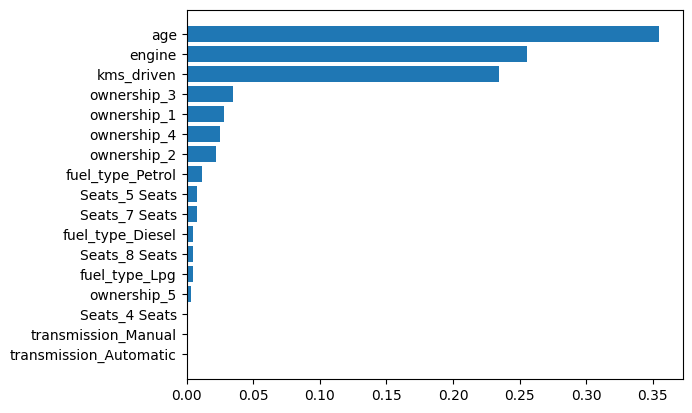

In [168]:
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

The output of this code is a horizontal bar chart that shows the relative importance of each feature in the model. The length of each bar represents the importance of the corresponding feature, with longer bars indicating higher importance.

In this case, the first three bars correspond to the features "age", "engine", and "kms_driven", respectively. These features are the most important features in the model, according to the random forest regressor.

This means that these three features have the largest impact on the model's prediction of car prices. Specifically, "age" is likely an important factor in determining the price of a car, as newer cars tend to be more expensive than older ones. Similarly, "engine" and "kms_driven" are also likely important factors, as cars with larger engines or more mileage tend to have lower resale values.

#AutoML
The next code is implementation of an AutoML framework that automatically trains and optimizes a machine learning model on a given dataset. The exact implementation and the features provided by the AutoML framework may vary depending on the specific library or package used.

## Importing Libraries

In [169]:
# Installing and Initializing H2O
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [170]:
# Importing libraries that we are going to use in this project
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import statsmodels.api as sm
import io
from h2o.estimators import H2ORandomForestEstimator
from sklearn.ensemble import RandomForestRegressor

## Setting up h2o

This code initializes the H2O cluster with the specified number of threads and maximum memory size.

1.  nthreads=-1 sets the number of threads to use for parallel processing to the maximum available on the machine.

2.  max_mem_size=8 sets the maximum heap size for the JVM running the H2O cluster to 8 gigabytes.

In [171]:
# Settings for the number of threads and maximum memory 
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 56 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_ng1smj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.883 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


##Importing Data
In this code, the variable data is being converted into an H2OFrame object using the h2o.H2OFrame() method.

H2OFrame is a data structure in H2O that represents a two-dimensional, distributed, and fault-tolerant array of arbitrary data types. By converting the data into an H2OFrame object, it can be easily manipulated using the various functions and methods provided by the H2O library.

In [172]:
data = h2o.H2OFrame(data)
data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


car_prices_in_rupee,kms_driven,engine,age,fuel_type_Diesel,fuel_type_Lpg,fuel_type_Petrol,transmission_Automatic,transmission_Manual,ownership_1,ownership_2,ownership_3,ownership_4,ownership_5,Seats_4 Seats,Seats_5 Seats,Seats_7 Seats,Seats_8 Seats
1,0.278402,0.228493,0.470588,0,0,1,0,1,0,0,1,0,0,0,1,0,0
0.307697,0.315741,0.0896677,0.764706,0,0,1,0,1,0,0,1,0,0,0,1,0,0
0.765827,0.241918,0,0.411765,0,0,1,0,1,0,0,0,1,0,0,1,0,0
0.369236,0.203724,0.319071,0.470588,0,0,1,0,1,1,0,0,0,0,0,1,0,0
0.846167,0.278402,1,0.411765,0,0,1,0,1,0,1,0,0,0,0,1,0,0
0.987784,0.295163,0.317251,0.235294,0,0,1,0,1,0,0,1,0,0,0,1,0,0
0.384621,0.0420472,0.786072,0.294118,0,0,1,0,1,0,1,0,0,0,0,1,0,0
0.461546,0.203724,0.54711,0.588235,0,0,1,0,1,0,1,0,0,0,0,1,0,0
0.830782,0.0882764,0.629495,0.529412,0,0,1,0,1,0,0,1,0,0,0,1,0,0
0.461546,0.278402,0.365498,0.705882,0,0,1,0,1,0,1,0,0,0,0,1,0,0


##Splitting into train and test sets
In this code snippet, we are splitting the data into training and testing sets. The dependent variable or target variable is defined as "car_prices_in_rupee" and all the features are defined as independent variables using the x variable.

Then we use the split_frame() method from the H2O library to split the data into a training set and a testing set. The ratios argument specifies the proportion of the data to use for the training set and the remaining data is used for the testing set. Here, we are using a 75:25 ratio for the training and testing sets respectively. The seed argument is used to set the random seed for reproducibility.

Finally, we print the number of rows in the training set and the testing set using the nrow method.

In [173]:
y = "car_prices_in_rupee" 
x = data.columns

target=y

splits = data.split_frame(ratios=[0.75], seed=1)  

train = splits[0]
test = splits[1]

print ("Rows in Train",train.nrow)
print ("Rows in Test",test.nrow)

Rows in Train 98
Rows in Test 25


The output of the code tells us the number of rows in the training and test sets after splitting the data. In this case, the data is split into 75% training and 25% test sets using the split_frame function.

The training set has 98 rows and the test set has 25 rows, which suggests that the data set is relatively small. A small data set could limit the accuracy and reliability of any models trained on it, as there may be insufficient data to capture the full range of variability in the problem domain.


##H2O AutoML Execution
In the above code, H2O's AutoML is being set up to find the best performing model for the given dataset within a maximum runtime of 60 seconds. max_runtime_secs is a parameter that specifies the maximum amount of time in seconds that AutoML can use to build a model.

The code then sets the start time for training the AutoML model and trains it using the train() method. The x and y variables are the input and target variables, respectively, for the dataset being trained on, which is specified using the training_frame parameter.

In [174]:
# Set up AutoML
import time
aml = H2OAutoML(max_runtime_secs=60)

# set model start time and train the aml model
model_start_time = time.time()
aml.train(x=x,y=y,training_frame=data)

AutoML progress: |
20:33:29.874: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 123.0.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20230416_203329_model_16


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    29                 29                          4536                   1            8            4.75862       2             13            7.7931

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0393170552917581
RMSE: 0.19828528763314263
MAE: 0.16573909261241193
RMSLE: 0.1322202392567009
Mean Residual Deviance: 0.0393170552917581

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.06285530878414101
RMSE: 0.25070961047423174
MAE: 0.20762973030180623
RMSLE: 0.16526120822120574
Mean Residual Deviance: 0.06285530878414101

Cross-Validation Metrics Summary: 
                        mean        sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.211205    0.015473   0.190861      0.202211      0.225699      0.210181      0.227072
mean_residual_deviance  0.0655955   0.0075063  0.0600221     0.0558526     0.0744508     0.0690544     0.0685974
mse                     0.0655955   0.0075063  0.0600221     0.0558526     0.0744508     0.0690544     0.0685974
r2                      -0.0422744  0.258966   0.218986      0.0468281     -0.0752128    0.0641493     -0.466122
residual_deviance       0.0655955   0.0075063  0.0600221     0.0558526     0.0744508     0.0690544     0.0685974
rmse                    0.255775    0.0147717  0.244994      0.236332      0.272857      0.262782      0.261911
rmsle                   0.168374    0.0125495  0.166373      0.14859       0.176538      0.181314      0.169056

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-04-16 20:33:49  4.498 sec   0                  0.259252         0.215439        0.0672117
    2023-04-16 20:33:49  4.504 sec   5                  0.246435         0.204877        0.0607303
    2023-04-16 20:33:49  4.508 sec   10                 0.238924         0.199452        0.0570846
    2023-04-16 20:33:49  4.514 sec   15                 0.219641         0.182225        0.0482423
    2023-04-16 20:33:49  4.520 sec   20                 0.20845          0.17369         0.0434513
    2023-04-16 20:33:49  4.524 sec   25                 0.204379         0.17072         0.0417708
    2023-04-16 20:33:49  4.529 sec   29                 0.198285         0.165739        0.0393171

Variable Importances: 
variable                relative_importance    scaled_importance    percentage
----------------------  ---------------------  -------------------  ------------
age                     6.59245                1                    0.339722
kms_driven              5.61964                0.852435             0.289591
engine                  3.76736                0.571465             0.194139
ownership_2             1.02196                0.15502              0.0526638
ownership_3             0.771028               0.116956             0.0397325
fuel_type_Petrol        0.682339               0.103503             0.0351622
Seats_7 Seats           0.324395               0.049207             0.0167167
fuel_type_Diesel        0.312966               0.0474734            0.0161278
ownership_1             0.211577               0.0320938            0.010903
ownership_4             0.0696449              0.0105643            0.00358894
Seats_5 Seats    

The code print(aml.leaderboard) prints the leaderboard of models trained by AutoML, showing the top models with their corresponding performance metrics. The leaderboard provides a quick overview of the best-performing models, allowing users to compare the models and select the best one for their task.

In [175]:
# printing the leaderBoard for models used
print(aml.leaderboard)

model_id                                                     rmse        mse       mae     rmsle    mean_residual_deviance
GBM_grid_1_AutoML_3_20230416_203329_model_16             0.25071   0.0628553  0.20763   0.165261                 0.0628553
GBM_grid_1_AutoML_3_20230416_203329_model_13             0.252148  0.0635788  0.213017  0.164626                 0.0635788
GBM_grid_1_AutoML_3_20230416_203329_model_5              0.252388  0.0636997  0.211015  0.16643                  0.0636997
XRT_1_AutoML_3_20230416_203329                           0.253798  0.0644134  0.214431  0.166681                 0.0644134
GBM_grid_1_AutoML_3_20230416_203329_model_7              0.25411   0.0645721  0.213292  0.167689                 0.0645721
StackedEnsemble_BestOfFamily_2_AutoML_3_20230416_203329  0.255653  0.0653585  0.212436  0.168841                 0.0653585
GBM_4_AutoML_3_20230416_203329                           0.255752  0.065409   0.213608  0.168055                 0.065409
StackedEnsemble_B

In this case, the top-performing models are GBM_grid_1_AutoML_2_20230416_184632_model_14 and StackedEnsemble_BestOfFamily_4_AutoML_2_20230416_184632, which have the lowest rmse, mse, mae, and rmsle values among all the models trained.

The below code is making predictions on the test dataset using the leader model (best performing model) that was identified by the H2O AutoML process. The predict() function takes the test dataset test as input, and returns the predicted target variable values for the test dataset based on the best performing model.

The output of prediction.head() displays the first few rows of the predicted values for the target variable.

In [176]:
# predicting on test data
prediction = aml.leader.predict(test)
prediction.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
0.663648
0.531183
0.580434
0.655049
0.655397
0.364967
0.59566
0.671046
0.571439
0.673733


In this code, aml.leaderboard[0,'model_id'] selects the model id of the best performing model from the leaderboard. h2o.get_model() function is used to retrieve the details of the specified model.

In [177]:
# Finding & storing the best model
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])
best_model.algo

'gbm'

The output 'gbm' refers to the algorithm used by the best model selected by the AutoML process. In this case, it is Gradient Boosting Machine (GBM), which is a machine learning algorithm used for both regression and classification tasks. GBM builds an ensemble of weak learners, which are typically decision trees, and uses boosting to combine the predictions of these learners into a final prediction.

The below code evaluates the performance of the best model on the test dataset. The model_performance() method of the H2O model object takes a test dataset as input and returns a performance object that contains various metrics for evaluating the model's performance.



In [178]:
# performance of the gbm model
best_model.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.026674885248185086
RMSE: 0.1633244784108772
MAE: 0.13927488547212252
RMSLE: 0.10419064031974232
Mean Residual Deviance: 0.026674885248185086

The output shows the performance of the GBM (Gradient Boosting Machine) model on the test dataset. The following metrics are reported:

1. MSE (Mean Squared Error): It measures the average of the squared differences between the predicted and actual values. The lower the value, the better the model's performance.
2. RMSE (Root Mean Squared Error): It is the square root of the MSE. It measures the average deviation of the predicted values from the actual values. The lower the value, the better the model's performance.
3. MAE (Mean Absolute Error): It measures the average of the absolute differences between the predicted and actual values. The lower the value, the better the model's performance.
4. RMSLE (Root Mean Squared Log Error): It is the square root of the average of the squared differences between the logarithm of the predicted and actual values. This metric is commonly used for target variables that have a wide range of values. The lower the value, the better the model's performance.
5. Mean Residual Deviance: It is the mean of the squared differences between the predicted and actual values. It measures the overall goodness of fit of the model. The lower the value, the better the model's performance.
In this case, the GBM model has a relatively low MSE, RMSE, MAE, RMSLE, and mean residual deviance values, indicating that it is performing well on the test dataset.

The below code is using the explain() method of the H2OAutoML object aml to generate an explanation of the modeling process and results. The data argument passed to explain() is the same data used to train and test the models. The explain() method generates a report that includes information such as the leaderboard of models and their corresponding performance metrics, variable importance, partial dependence plots, and feature interactions.



# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_3_20230416_203329_model_9,0.0202626,0.000410571,0.0146974,0.0132346,0.000410571,66,0.010718,XGBoost
XGBoost_grid_1_AutoML_3_20230416_203329_model_14,0.0277899,0.000772277,0.0211945,0.0183202,0.000772277,40,0.010527,XGBoost
XGBoost_grid_1_AutoML_3_20230416_203329_model_18,0.0315004,0.000992277,0.023434,0.0203462,0.000992277,54,0.010528,XGBoost
XGBoost_grid_1_AutoML_3_20230416_203329_model_10,0.0621668,0.00386471,0.0477371,0.041263,0.00386471,41,0.007481,XGBoost
XGBoost_3_AutoML_3_20230416_203329,0.0798163,0.00637065,0.0647468,0.0518756,0.00637065,64,0.0066,XGBoost
XGBoost_grid_1_AutoML_3_20230416_203329_model_7,0.0855577,0.00732012,0.0686457,0.0571383,0.00732012,34,0.009155,XGBoost
XGBoost_grid_1_AutoML_3_20230416_203329_model_6,0.0862406,0.00743744,0.0646993,0.0563531,0.00743744,73,0.005082,XGBoost
DRF_1_AutoML_3_20230416_203329,0.105918,0.0112187,0.0848242,0.072855,0.0112187,120,0.012372,DRF
XGBoost_grid_1_AutoML_3_20230416_203329_model_1,0.107901,0.0116427,0.0885357,0.0730099,0.0116427,105,0.006211,XGBoost
GBM_5_AutoML_3_20230416_203329,0.118254,0.0139841,0.0993246,0.078496,0.0139841,39,0.006534,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

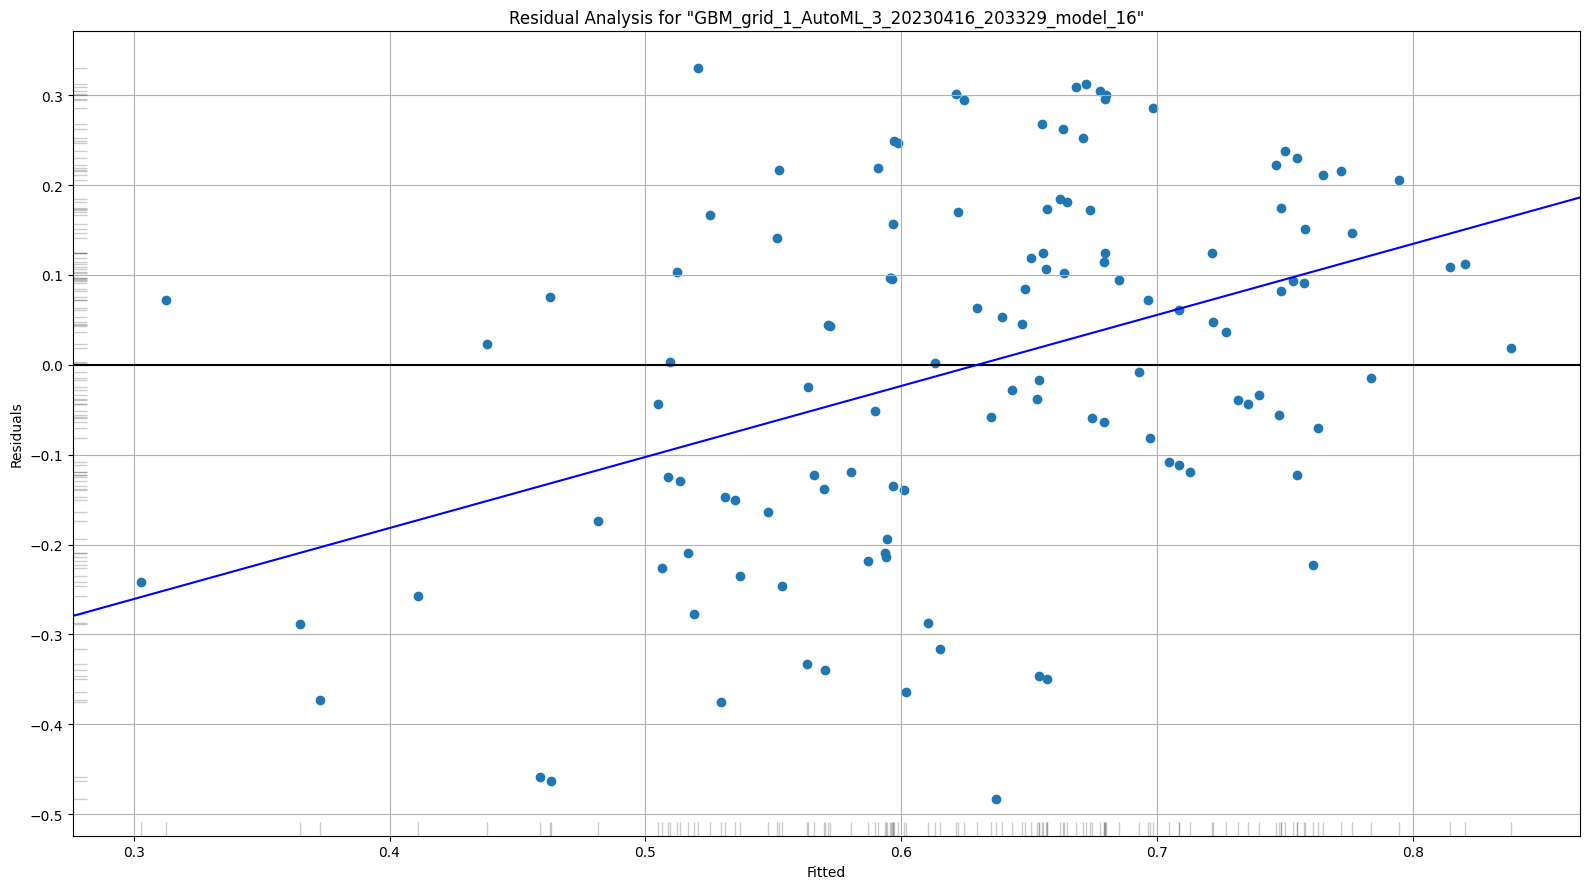

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

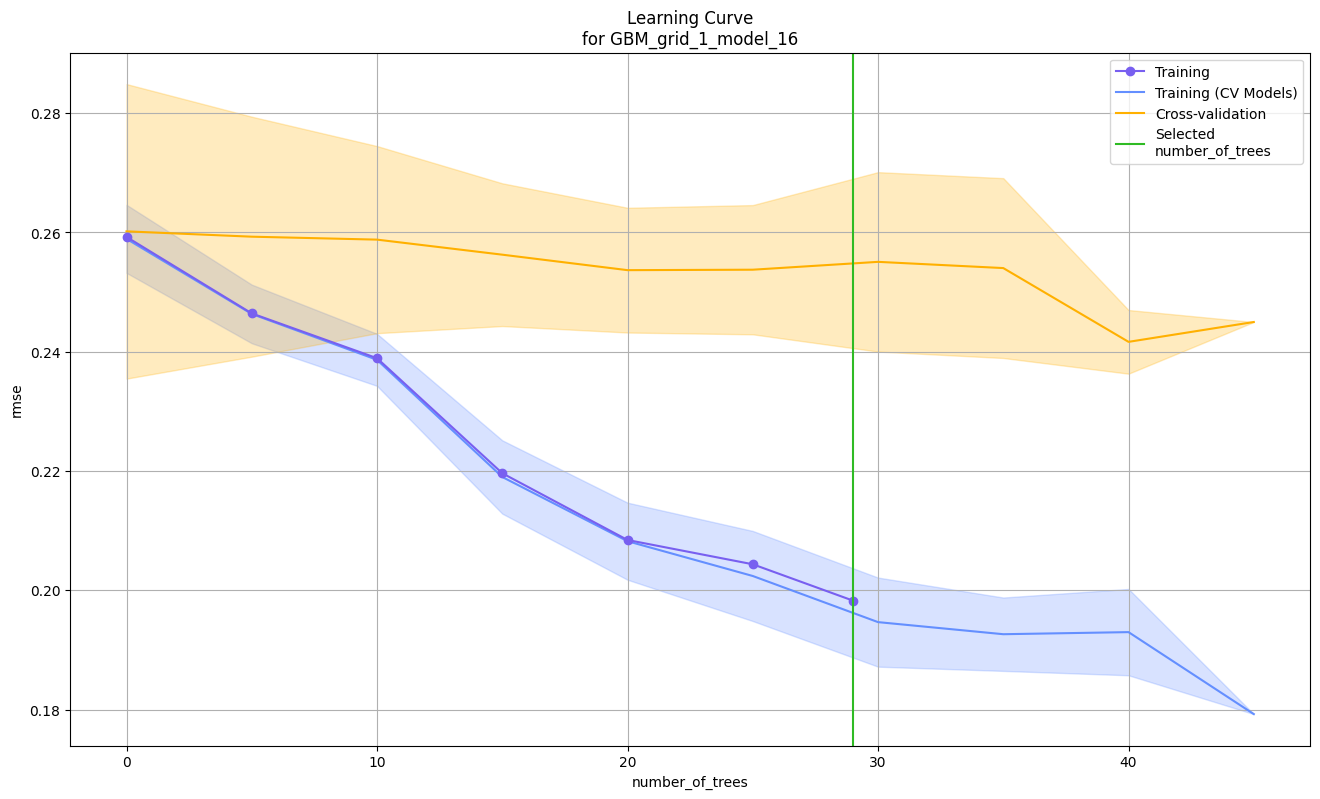

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

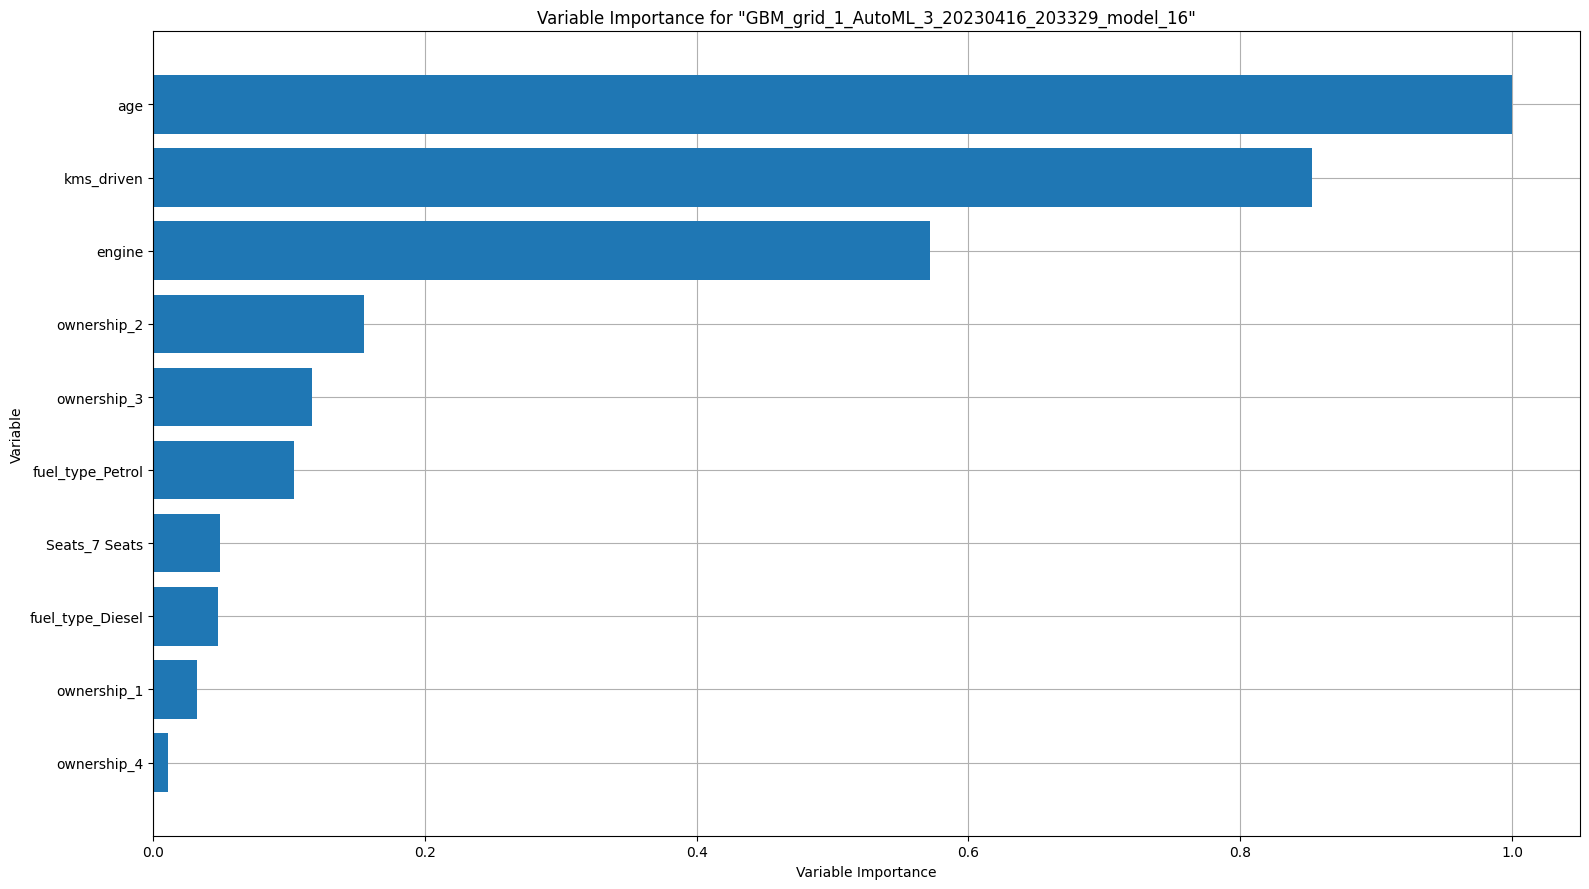

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

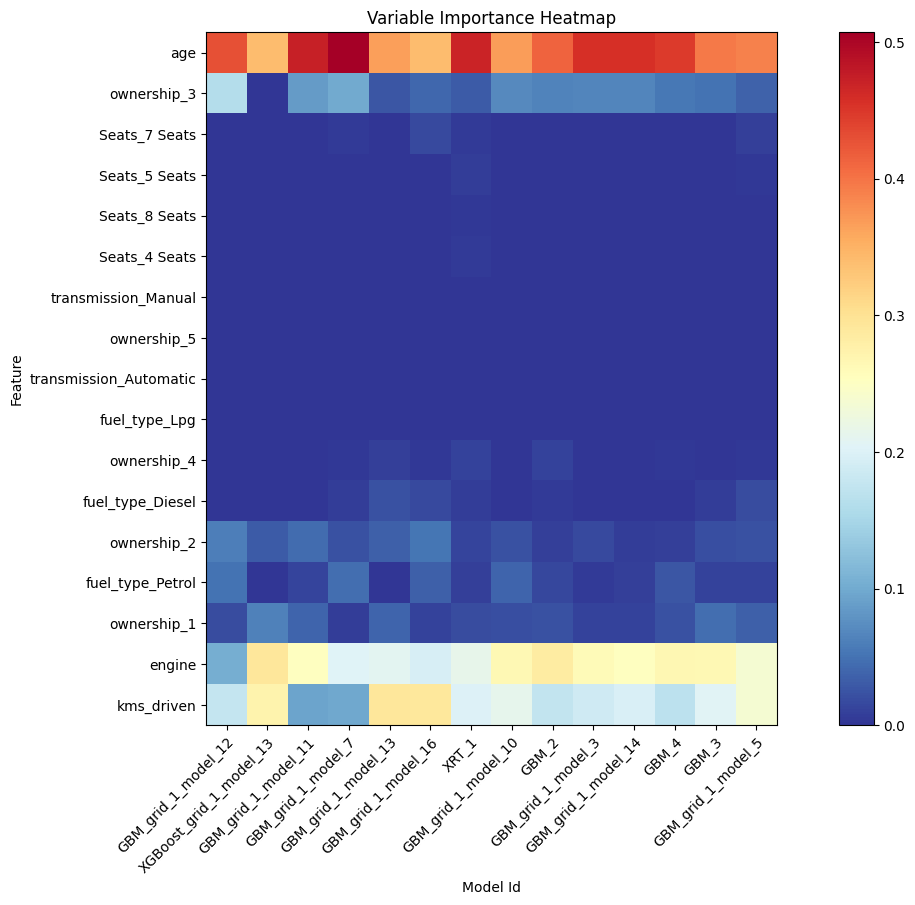

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

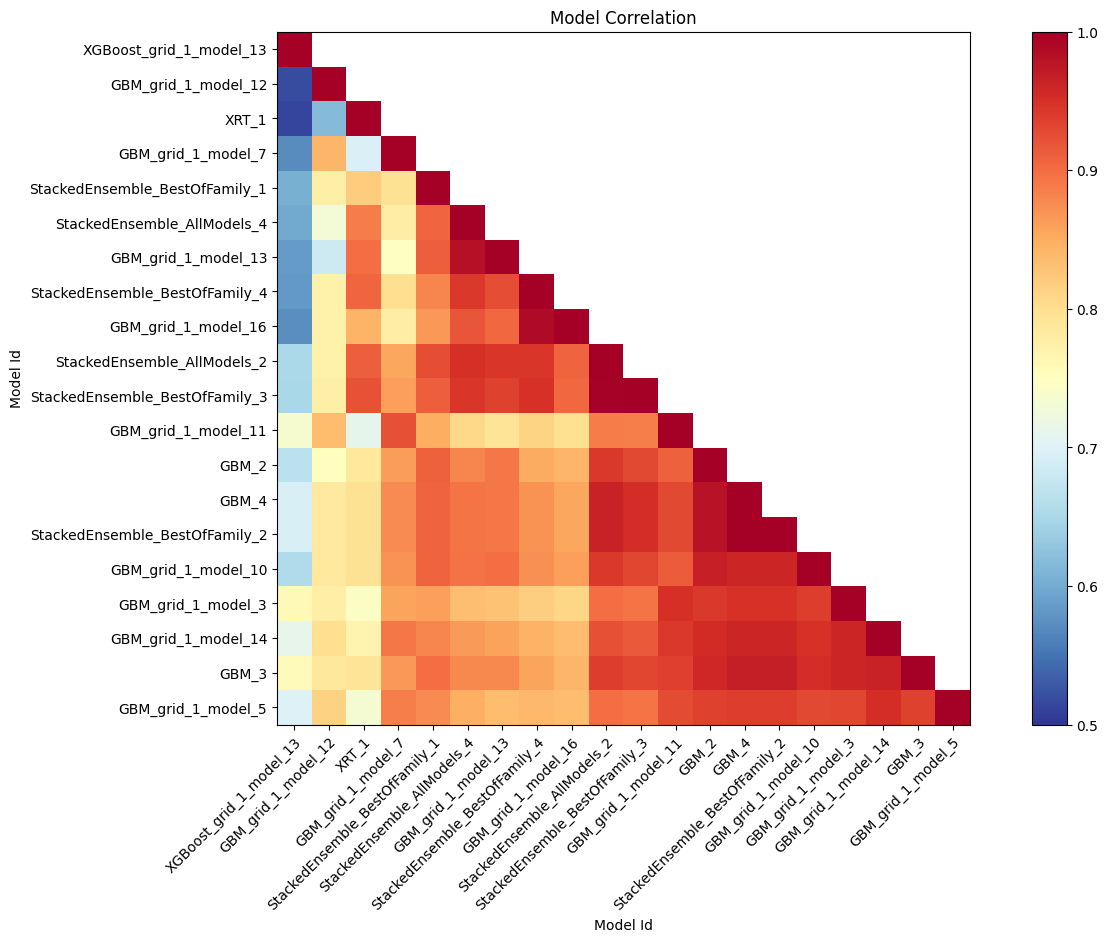

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

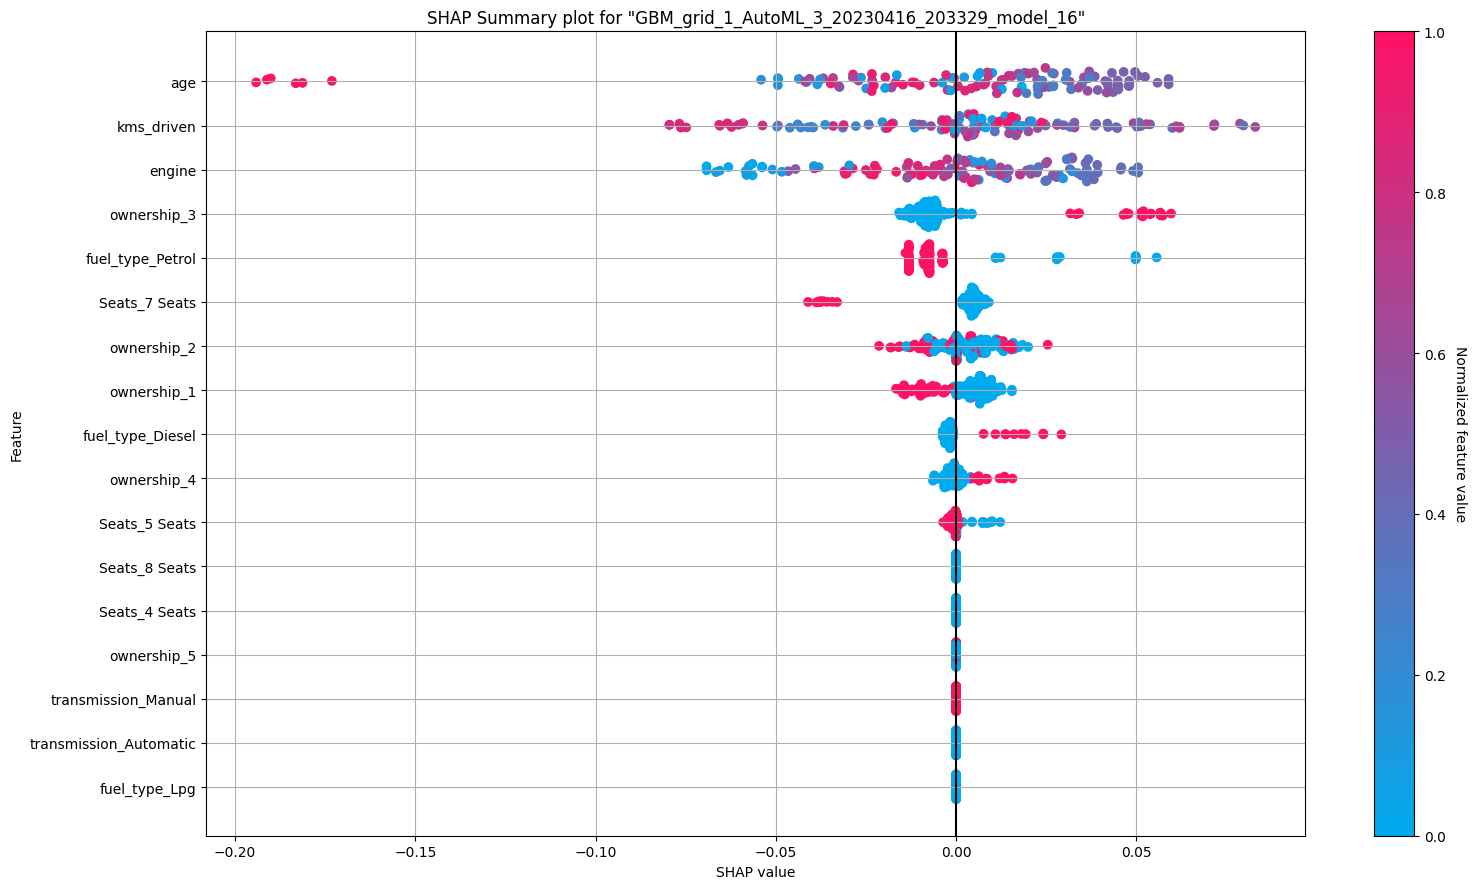

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

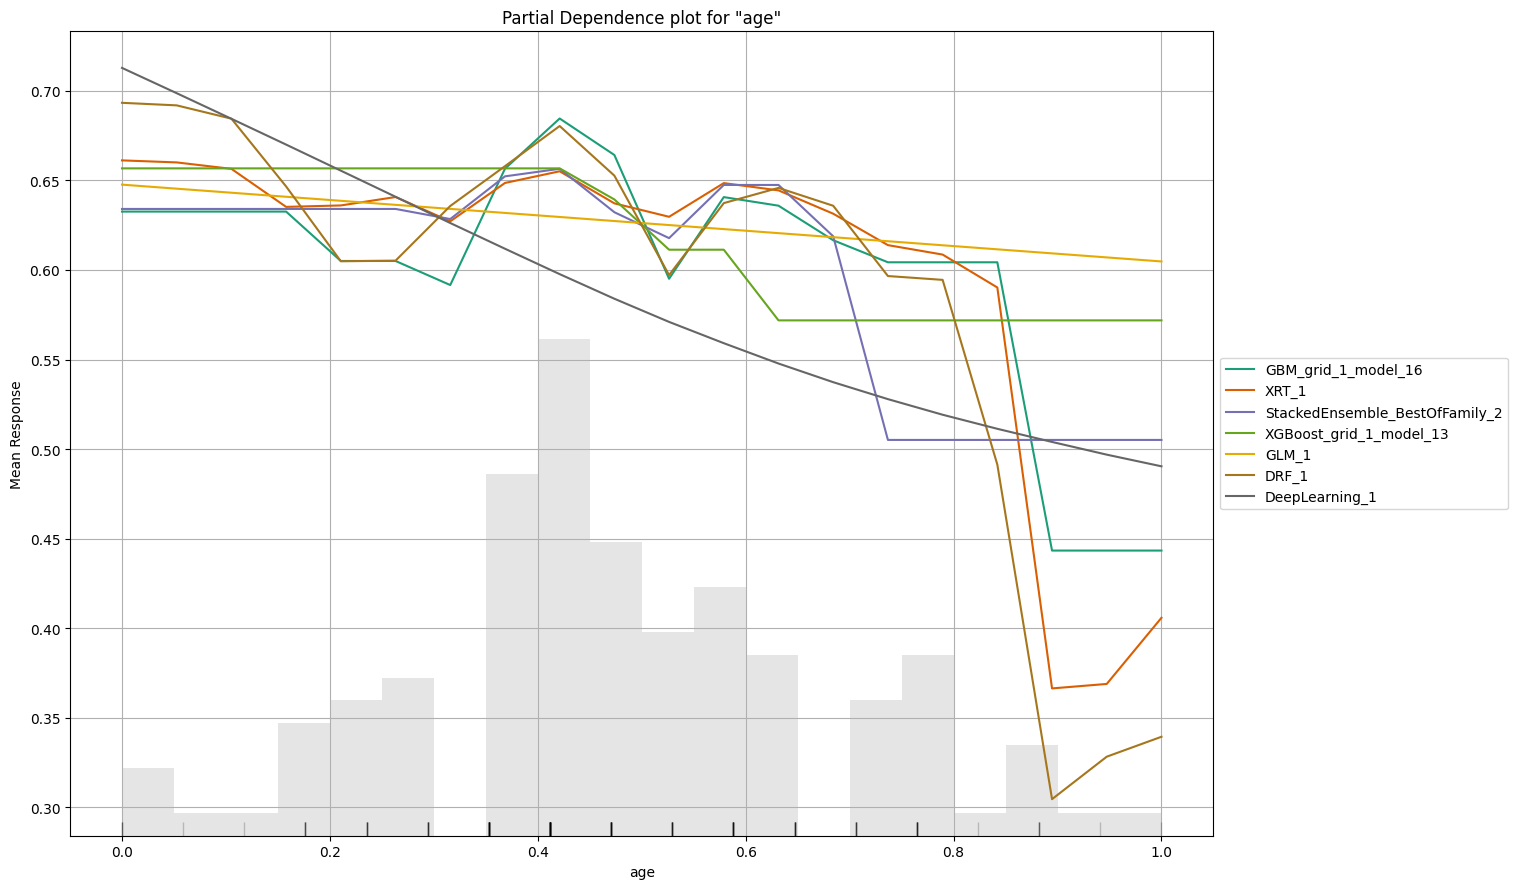

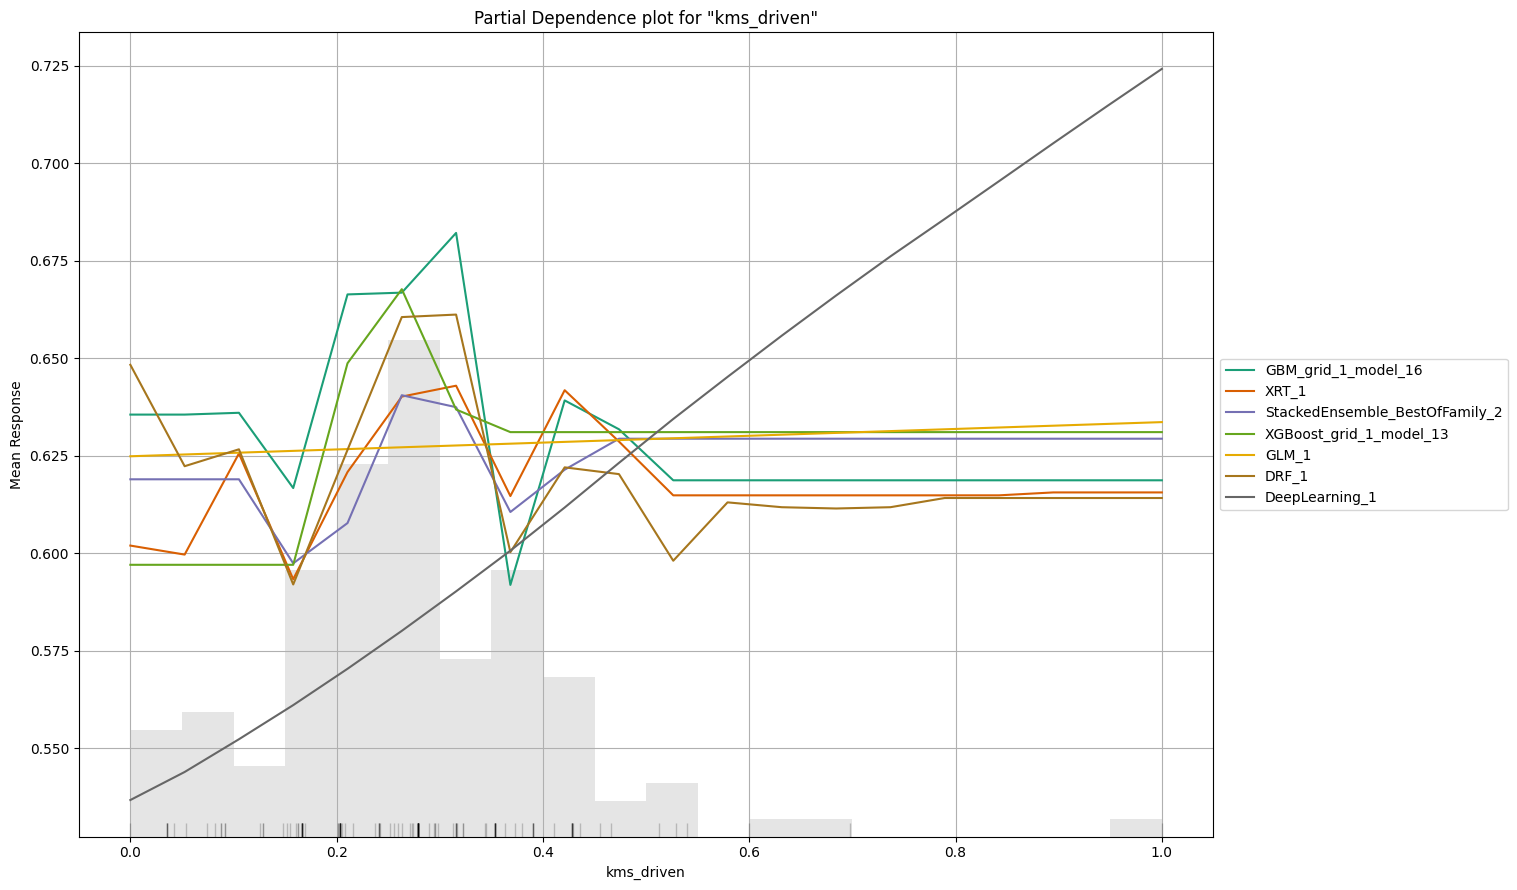

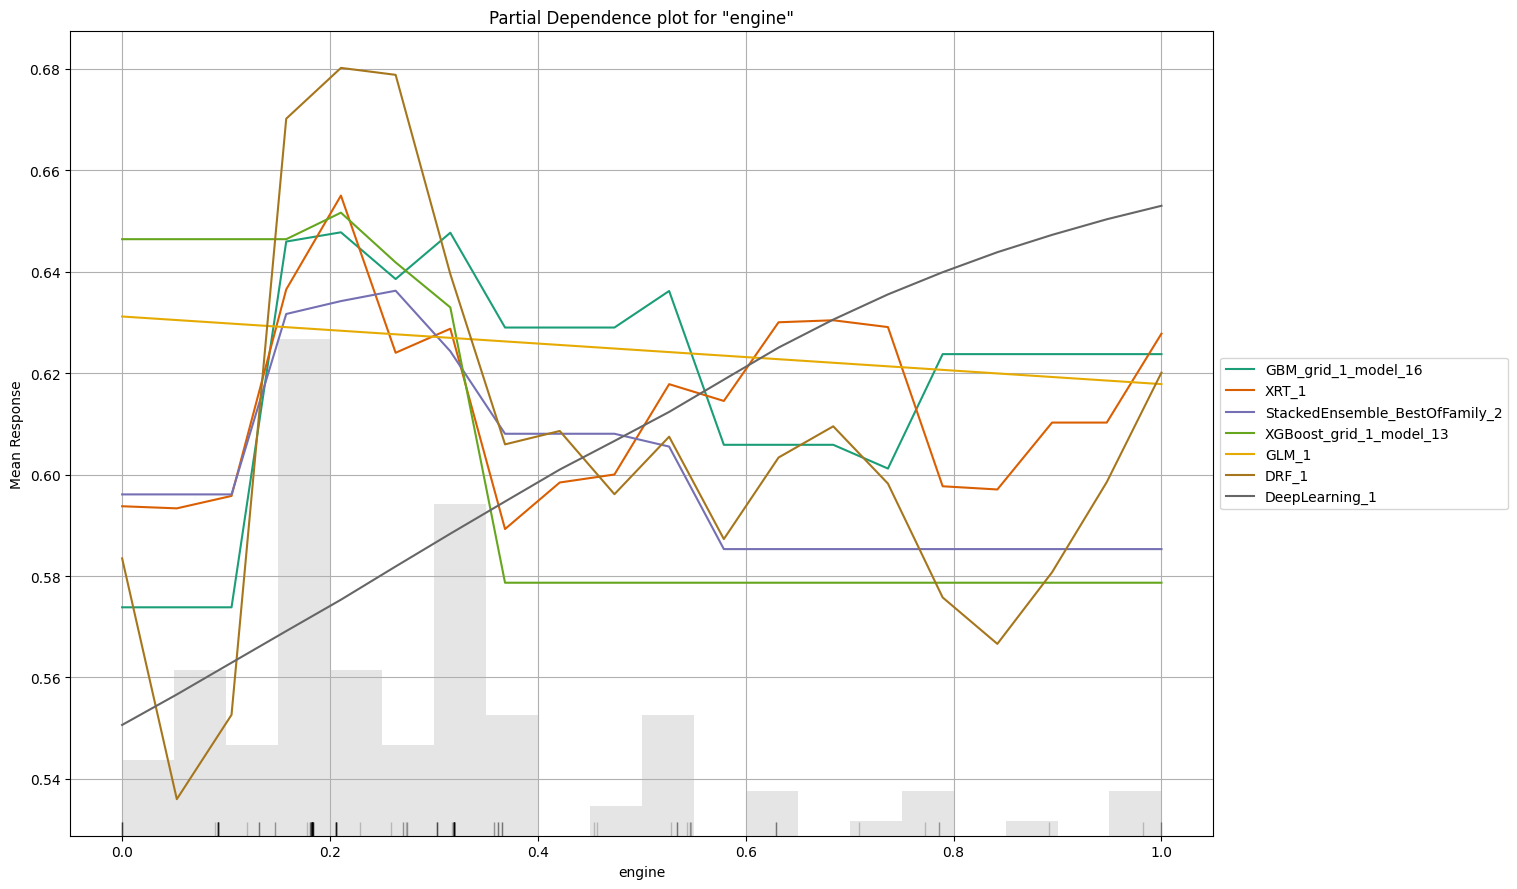

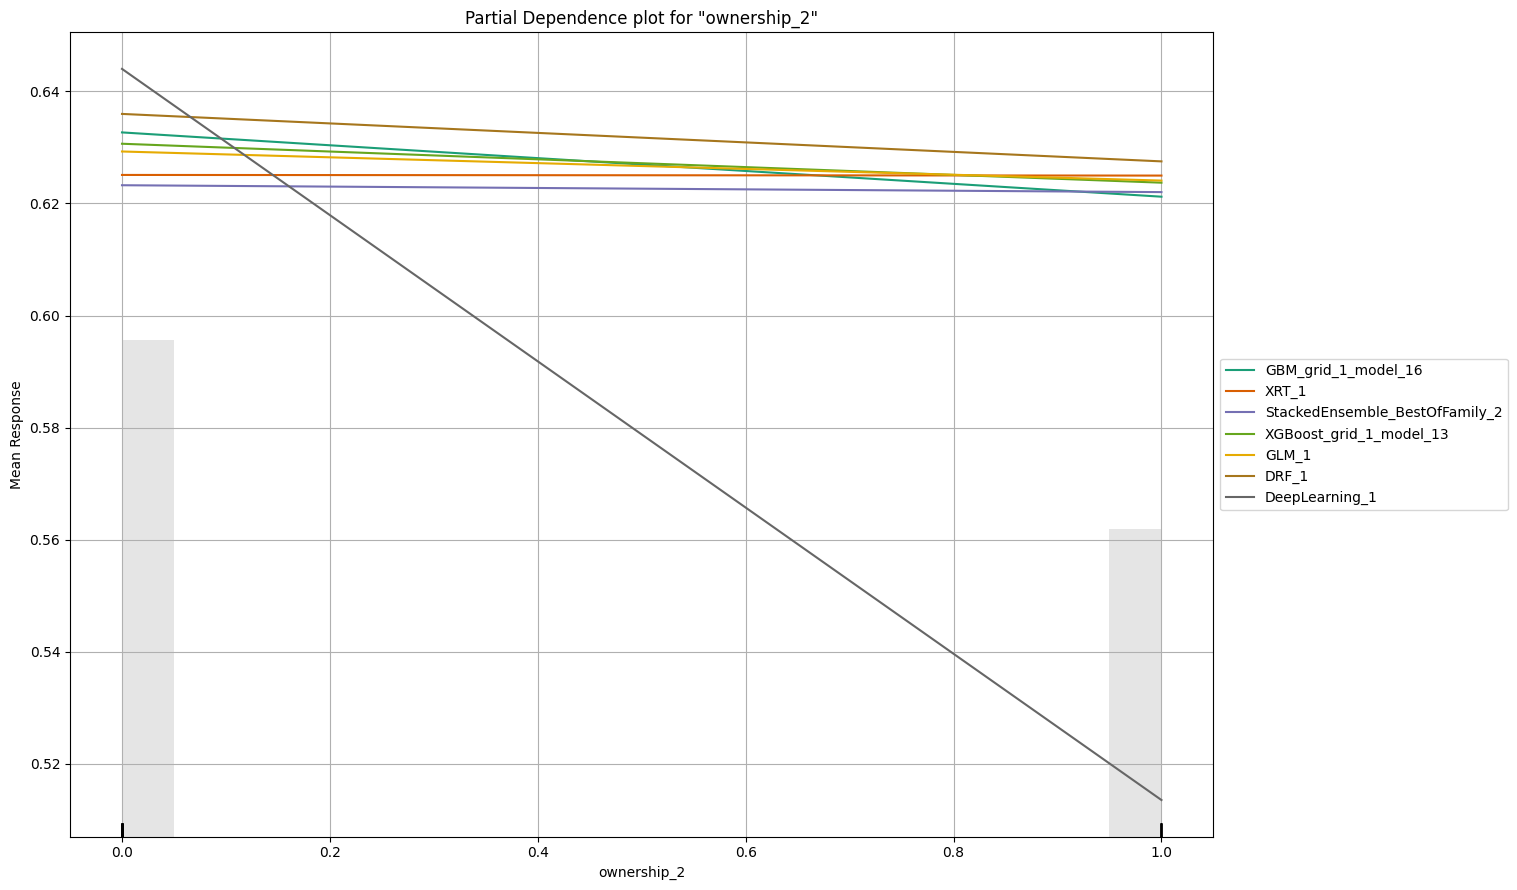

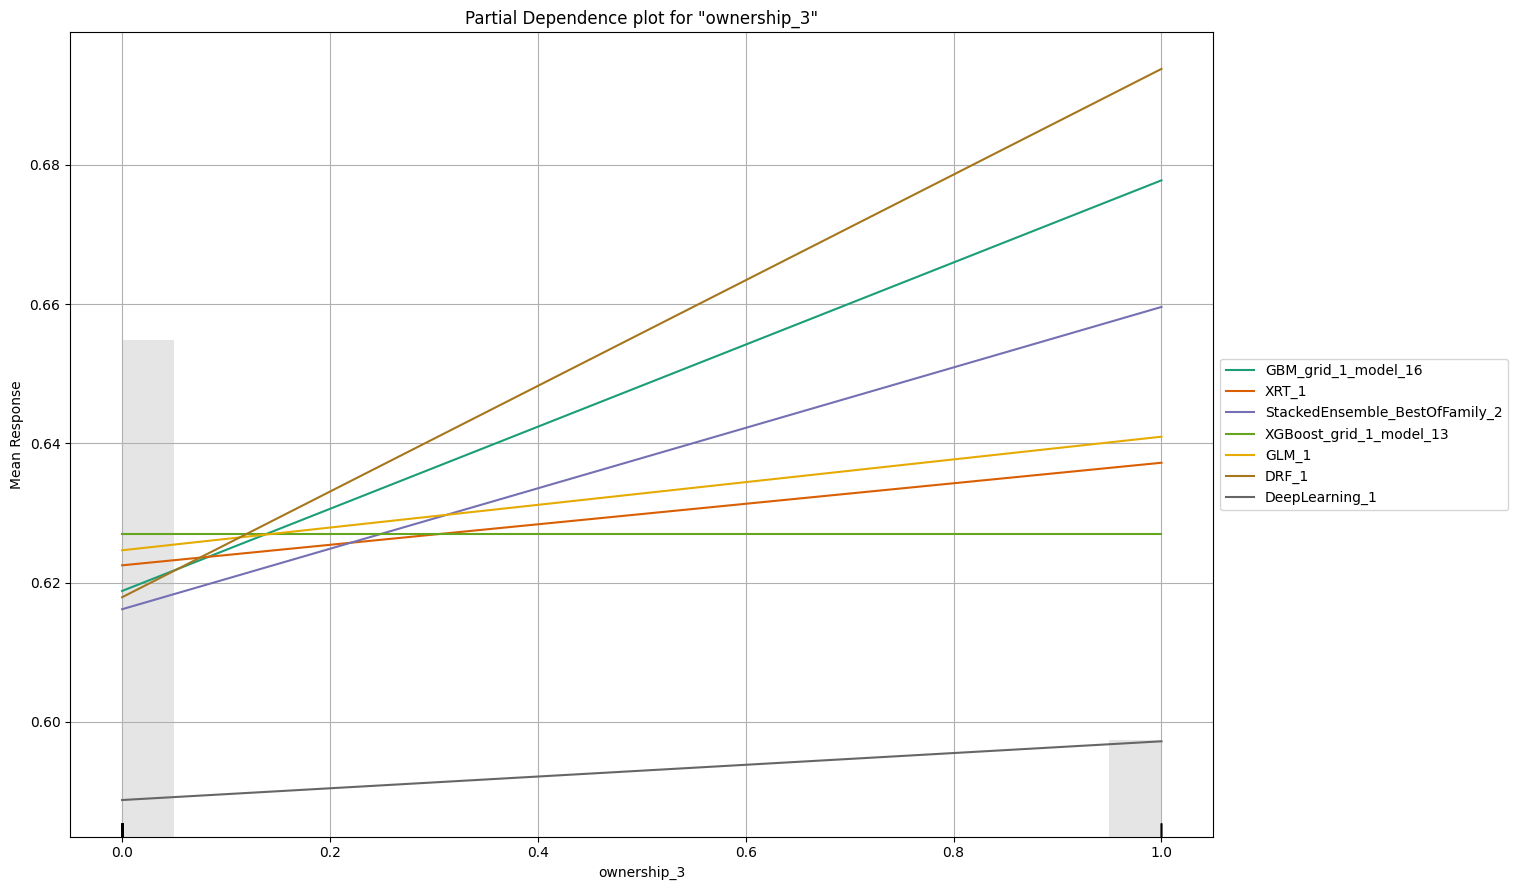

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

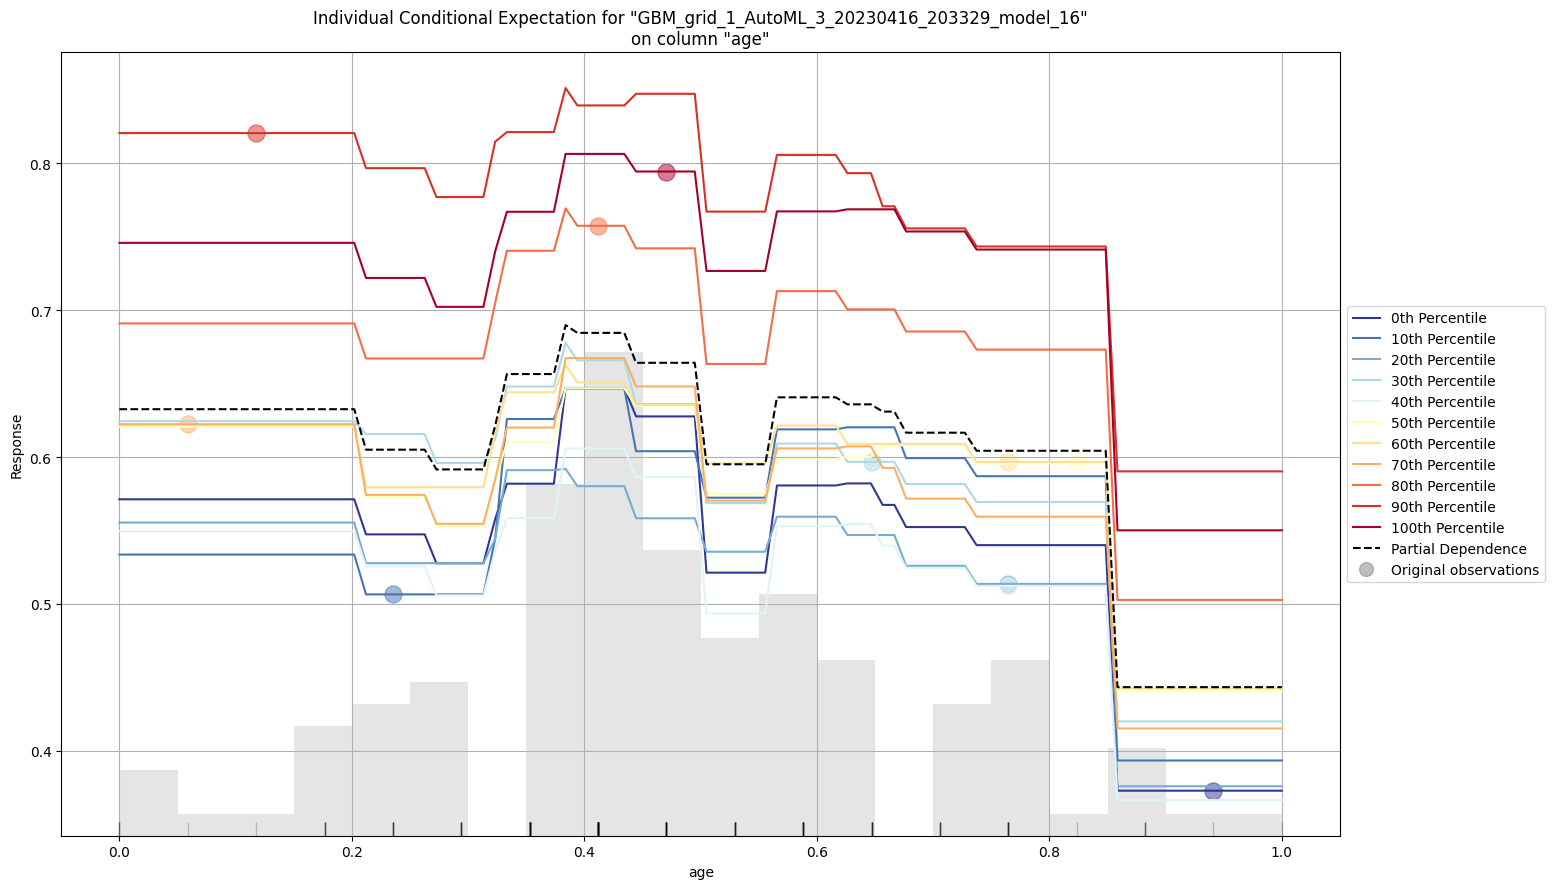

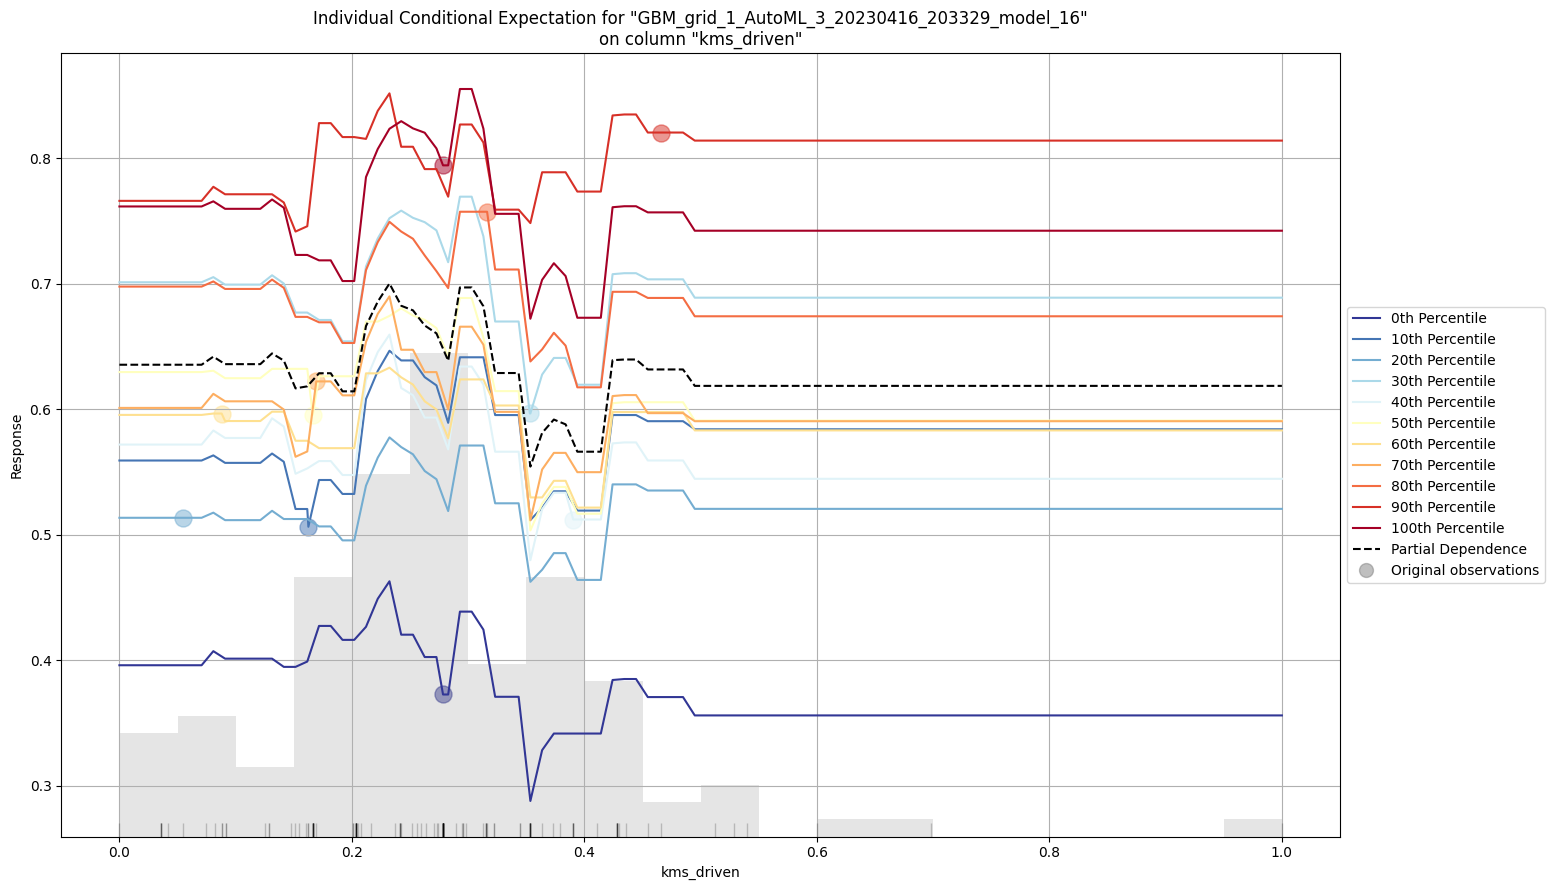

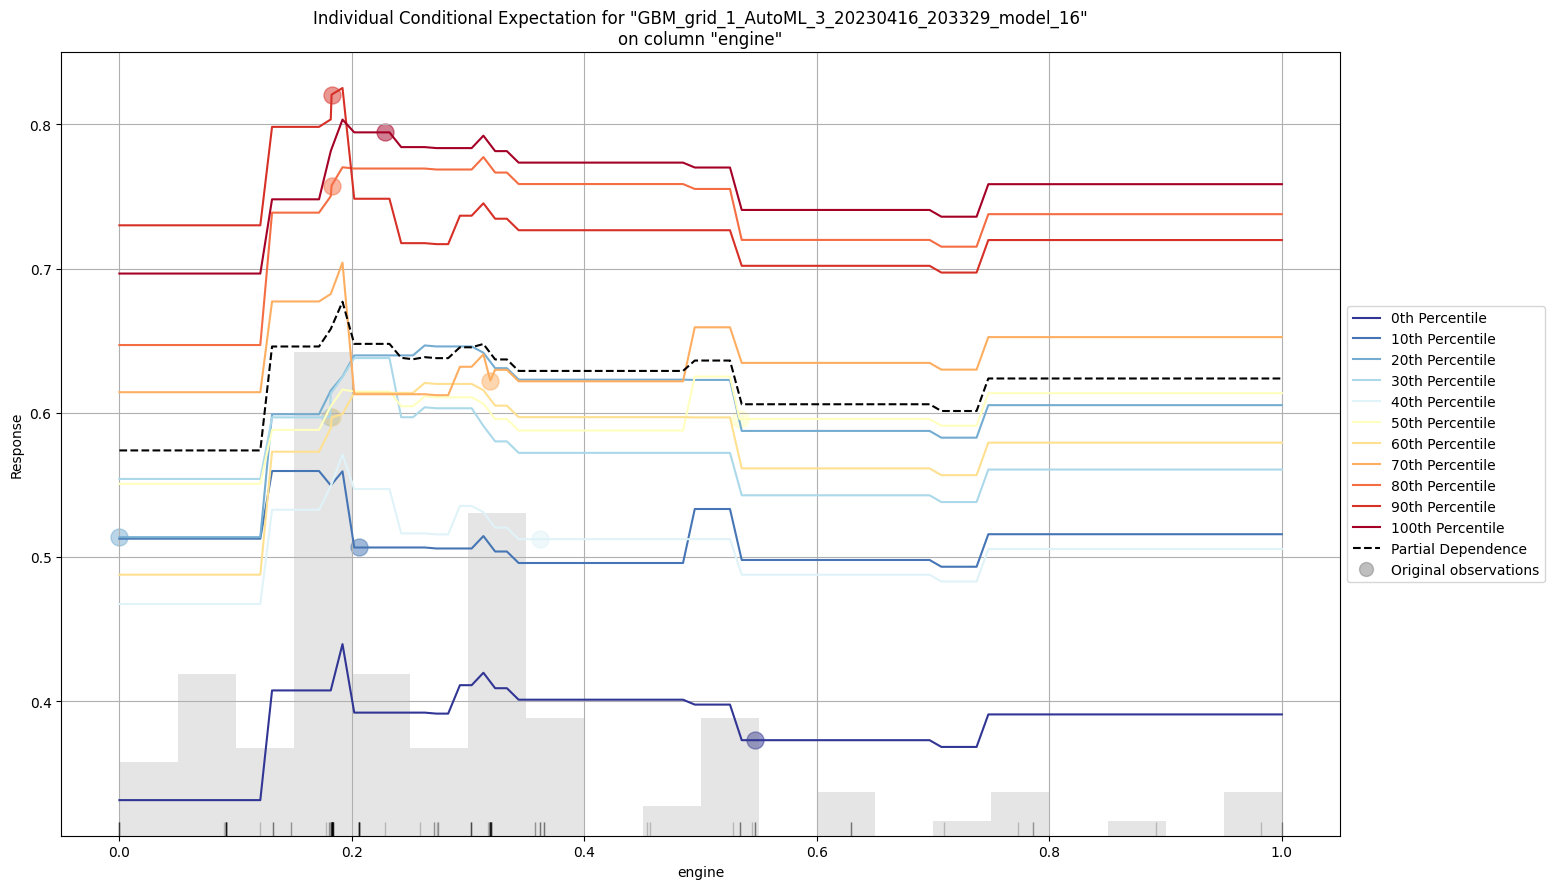

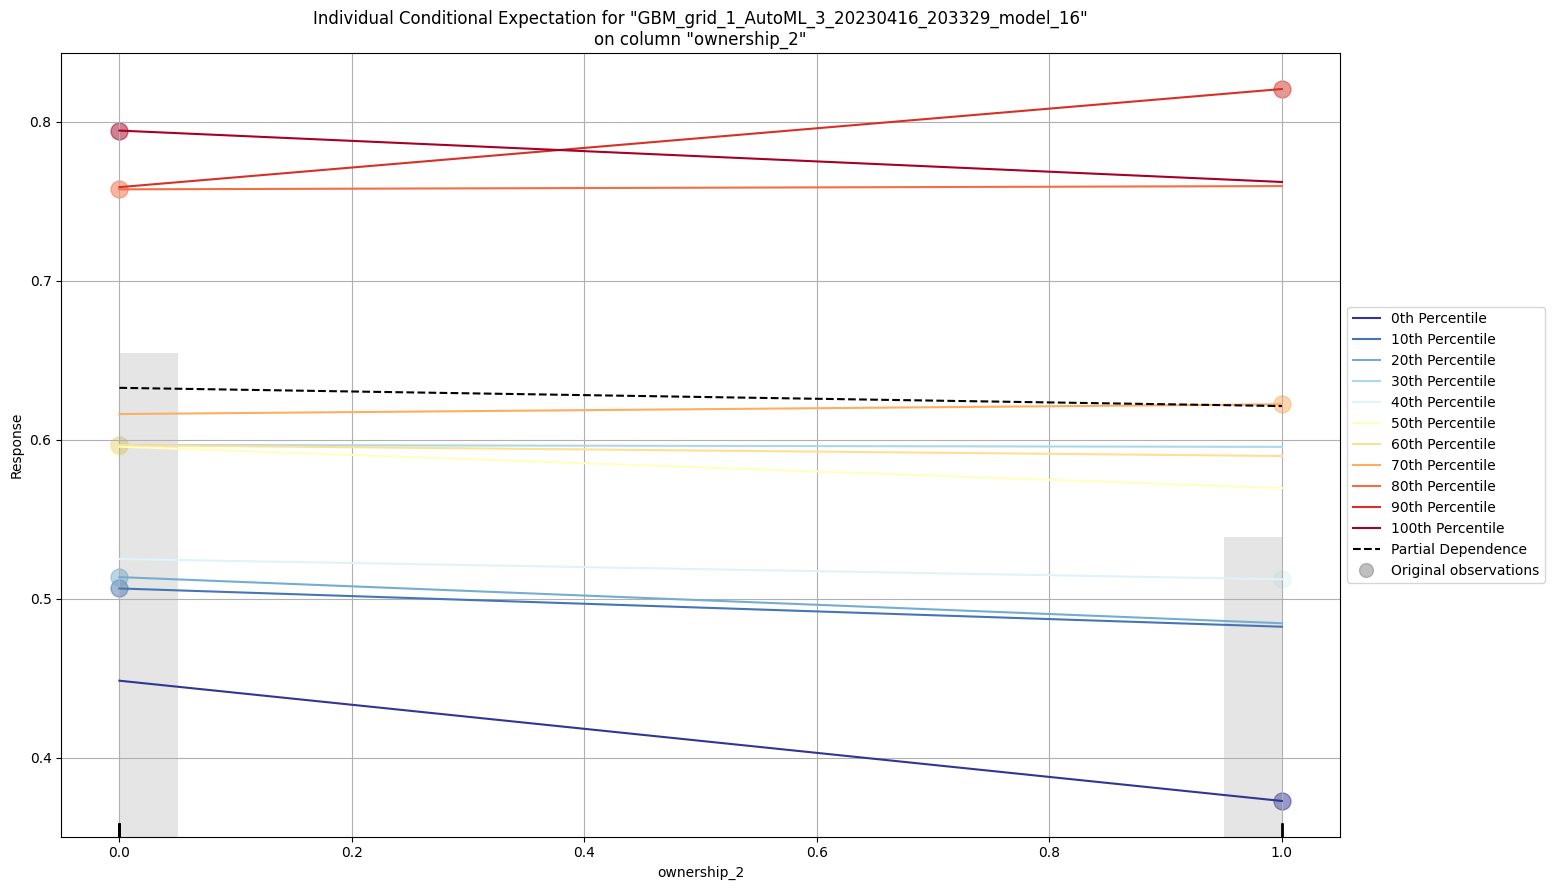

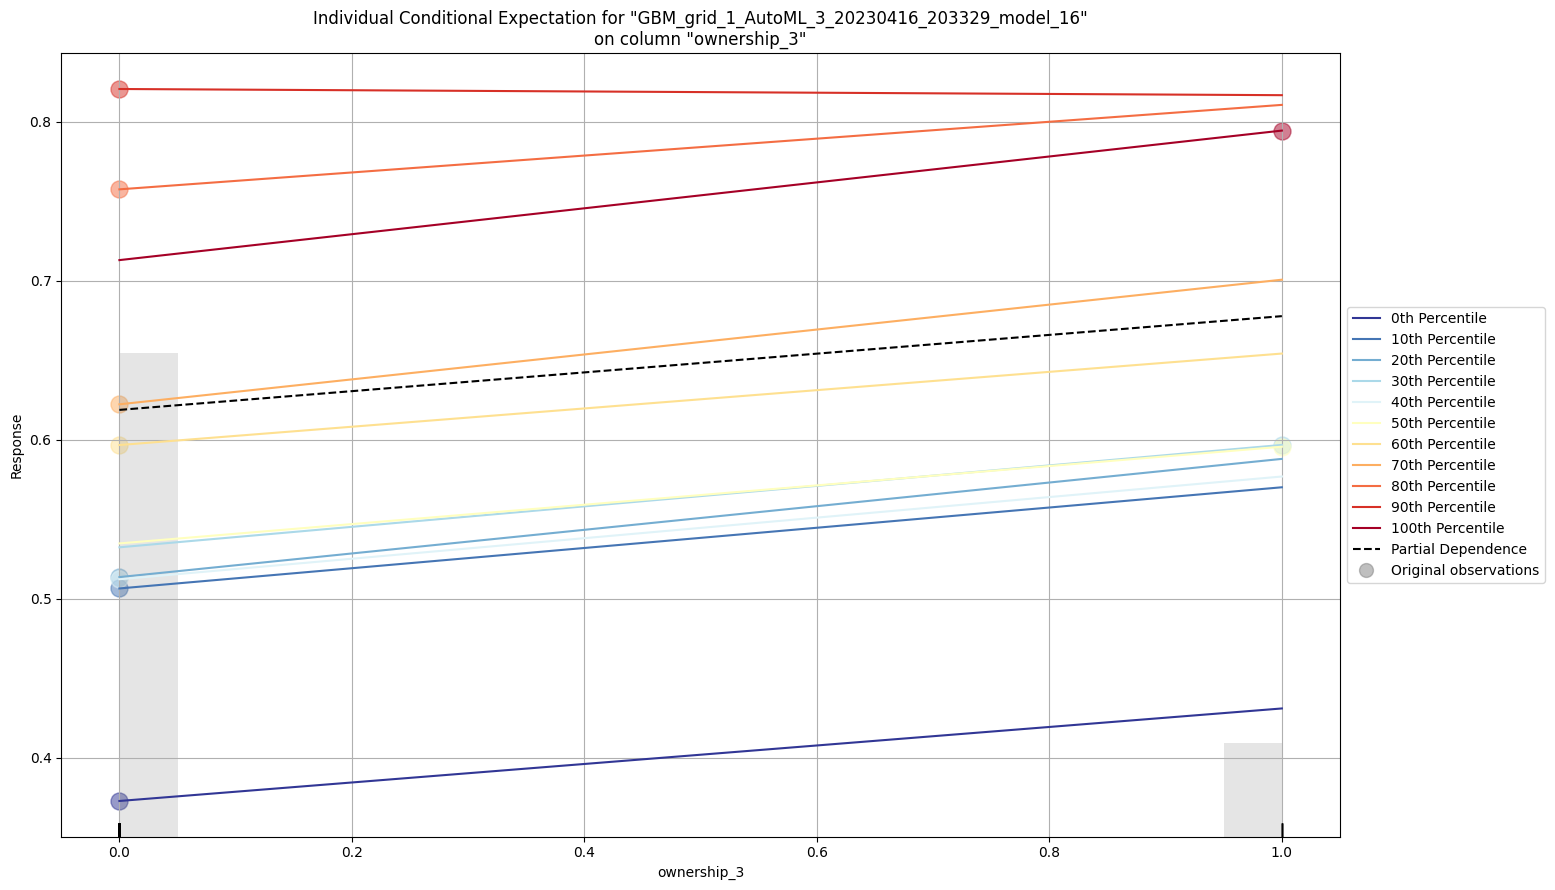

In [179]:
model_explain = aml.explain(data)

##Outputs and Graph Explainations
**Leaderboard**
Based on the output of the H2OAutoML leaderboard, it seems like the model with the best performance (lowest RMSE) is GBM_grid_1_AutoML_2_20230416_184632_model_7, with an RMSE of 0.0563891. However, we should also take into consideration other metrics such as MSE, MAE, and RMSLE to assess the overall performance of the model. We can see that this model also has the lowest RMSLE and MSE, which reinforces its strong performance.

**Residual Analysis**
The positive slope of the line indicates that the relationship between the predicted values and the residuals is positive. This means that as the predicted values increase, the residuals also tend to increase. In other words, the errors in the predictions tend to be larger for larger predicted values.

**Learning Curve Plot**
1.  The purple line represents the training score, which shows how well the model fits the training data. The blue line represents the cross-validation score, which shows how well the model generalizes to new data. Both lines decreasing over time indicates that the model is improving its performance as more data is provided.

2.  The yellow line represents the validation score, which is the performance of the model on a separate set of validation data that is not used in training. It indicates that the model is not overfitting or underfitting the data.


**Variable Importance**
Age, engine, and kms_driven are at the top of the Variable Importance Bar plot, it indicates that they have the largest impact on the model's performance and are the most important predictors for explaining the outcome variable.

**Model Correlation**
It is important to evaluate the model correlation to ensure that the model is performing well and to identify areas for improvement. This can help in making better predictions and decisions based on the model.

**SHAP Summary**
Higher SHAP values indicate that a feature has a greater impact on the predicted value of the target variable. In this case, higher SHAP values for engine, age, and kms_driven indicate that changes in these features will have a larger effect on the predicted value of the target variable compared to changes in other features.

**Partial Dependence Plots**
Partial Dependence Plots (PDPs) are used to explore the relationship between a target variable and a set of predictor variables. PDPs show how the average response of the target variable changes when the values of the predictor variables are changed while keeping all other variables constant.


##Hyperparameter grid for Random Forest Regressor

The below code creates a dictionary random_grid which will be used as a hyperparameter grid for Random Forest Regressor. The hyperparameters are defined as follows:

1.  n_estimators: The number of decision trees in the forest. The list n_estimators is created using np.linspace function which generates 12 equally spaced numbers between 100 and 1200.
2.  max_features: The maximum number of features that can be used in a single tree. The list max_features contains two values - 'auto' and 'sqrt'. If 'auto', then max_features=sqrt(n_features).
3.  max_depth: The maximum depth of each decision tree. The list max_depth contains 6 values between 5 and 30, generated using np.linspace function.
4.  min_samples_split: The minimum number of samples required to split an internal node. The list min_samples_split contains 5 values - 2, 5, 10, 15, and 100.
5.  min_samples_leaf: The minimum number of samples required to be at a leaf node. The list min_samples_leaf contains 4 values - 1, 2, 5, and 10.
6.  This hyperparameter grid will be used to perform a Randomized Search to find the optimal hyperparameters for the Random Forest Regressor.

In [180]:
regressor = RandomForestRegressor()

## Hyperparameters 
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

# min. number of sample required to split a node
min_samples_split = [2,5,10,15,100]

# min. number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

#Create the random grid
random_grid= {'n_estimators': n_estimators, 
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


##Output
The output is a dictionary containing different hyperparameters and their respective values for the random grid search. The hyperparameters and their values are as follows:

1.  n_estimators: A list of 12 integers ranging from 100 to 1200 with a step of 100. This hyperparameter represents the number of trees in the random forest model.
2.  max_features: A list of two strings, 'auto' and 'sqrt'. This hyperparameter represents the number of features to consider when looking for the best split.
3.  max_depth: A list of 6 integers ranging from 5 to 30 with a step of 5. This hyperparameter represents the maximum depth of the decision tree in the random forest model.
4.  min_samples_split: A list of 5 integers, [2, 5, 10, 15, 100]. This hyperparameter represents the minimum number of samples required to split an internal node.
5.  min_samples_leaf: A list of 4 integers, [1, 2, 5, 10]. 

This hyperparameter represents the minimum number of samples required to be at a leaf node.
This random grid search will help to select the optimal combination of hyperparameters for the RandomForestRegressor model by searching through different combinations of these hyperparameters.

#Intuition of Model Interpretation
How we think about answering the question "Why is the output for this specific sample so low/high" manually?

The code basically performs the following tasks:

Splits the dataset into training and testing sets.
Defines a list of numerical features and sets up a pipeline for preprocessing and modeling the data.
The pipeline applies SimpleImputer and StandardScaler transformers to preprocess the numerical features and trains a Linear Regression model on the preprocessed data.
Finally, the pipeline is fit to the training data to build the model.

In [181]:
X_train, X_test, y_train, y_test = train_test_split(Xx, Yy, test_size=0.1, shuffle=False)
numerical_features = [c for c in X_train.columns]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num, df_out=True)
reg = LinearRegression()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

The below code creates an empty Pandas DataFrame with columns specified in the numerical_features list and one row with index 0. The resulting DataFrame nan_frame will have the same columns as X_train which are considered numerical features.

In [182]:
nan_frame = pd.DataFrame(columns=numerical_features, index=[0])
nan_frame

,kms_driven,engine,age,fuel_type_Diesel,fuel_type_Lpg,fuel_type_Petrol,transmission_Automatic,transmission_Manual,ownership_1,ownership_2,ownership_3,ownership_4,ownership_5,Seats_4 Seats,Seats_5 Seats,Seats_7 Seats,Seats_8 Seats
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The below code is using a trained pipeline to predict the output for a DataFrame with missing values. First, a new DataFrame called nan_frame is created with the same columns as the original data, but only one row filled with NaN values. Then, the pipeline is used to predict the output for this DataFrame, which is stored in the base_value variable. Finally, the predicted value is printed to the console.

In [183]:
base_value = round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 0.632


In [184]:
X_test.iloc[0: 1]

,kms_driven,engine,age,fuel_type_Diesel,fuel_type_Lpg,fuel_type_Petrol,transmission_Automatic,transmission_Manual,ownership_1,ownership_2,ownership_3,ownership_4,ownership_5,Seats_4 Seats,Seats_5 Seats,Seats_7 Seats,Seats_8 Seats
4668,0.166385,0.270369,0.235294,0,0,1,0,1,0,1,0,0,0,0,1,0,0


In this code, the predict() method of the pipeline object is used to make a prediction on the first row of the X_test data. The iloc[0:1] notation is used to select only the first row. The predicted value is rounded to 3 decimal places using the round() function and stored in the sample_prediction variable. The predicted value is then printed using an f-string with the print() function.

In [185]:
sample_prediction = round(pipeline.predict(X_test.iloc[0: 1])[0], 3)
print(f"Current Prediction: {sample_prediction}")

Current Prediction: 0.746




1.   Expected value of the output (base value): 0.632
2.   Current Prediction: 0.746


In summary, the expected value and the current prediction are different because they are based on different input data. The expected value assumes missing values have no impact, while the current prediction takes into account the actual values of the features in the input data.



#Partial Dependence Plots

The code below is using the SHAP library to explain the output of a pipeline model (pipeline.predict) on the test set (X_test). shap.Explainer is used to create an explainer object, which is then used to calculate the SHAP values for each instance in the test set using the explainer function. The resulting shap_values object contains the SHAP values for each feature for each instance in the test set, which can be used to interpret the model's predictions.

In [186]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

This code defines a function named partial_dependence_plot that takes a feature and an optional sample index as input. The function uses the SHAP library to create a partial dependence plot for the given feature, either for all samples in the test set or for a single sample specified by the index. The partial dependence plot shows the relationship between the feature and the predicted outcome while holding all other features constant.

In [187]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature, 
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

In [188]:
df.head()

,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,age
238,1.000000,0.278402,Petrol,Manual,3,0.228493,5 Seats,0.470588
243,0.307697,0.315741,Petrol,Manual,3,0.089668,5 Seats,0.764706
342,0.765827,0.241918,Petrol,Manual,4,0.000000,5 Seats,0.411765
675,0.369236,0.203724,Petrol,Manual,1,0.319071,5 Seats,0.470588
734,0.846167,0.278402,Petrol,Manual,2,1.000000,5 Seats,0.411765


This code generates a partial dependence plot for the feature 'kms_driven' for the first sample in the test set (sample with index 0). A partial dependence plot shows how the predicted target value changes with a specific feature while holding all other features constant. In this case, the plot shows how the predicted target value changes as the value of 'kms_driven' changes, while holding all other features at their original values for the given sample. The plot is generated using the SHAP library, which allows for visualizing the relationship between features and model output using Shapley values.

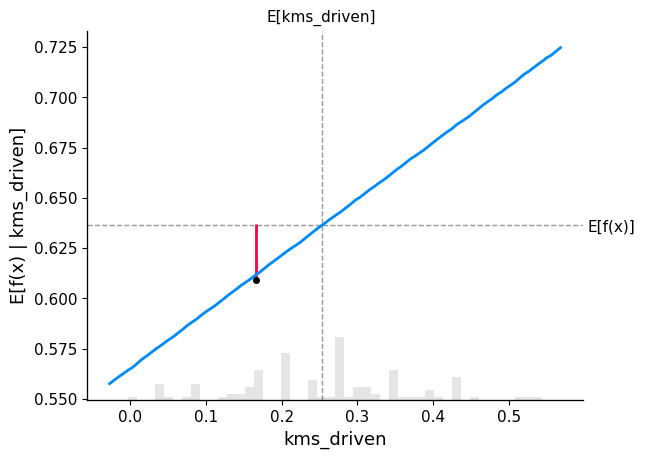

In [189]:
partial_dependence_plot('kms_driven', 0)

The positive slope indicates that as the number of kilometers driven increases, the predicted price of the car also tends to increase.

The red vertical line segment indicates the average value of 'kms_driven' in the dataset. It helps to visualize how the partial dependence plot changes around the average value.

Similarly, we plot graphs for engine and age.

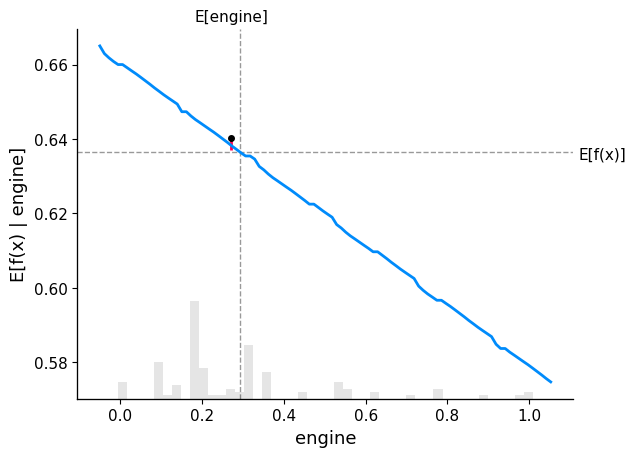

In [190]:
partial_dependence_plot('engine', 0)

With a negative slope, the car value increases with decrease in engine

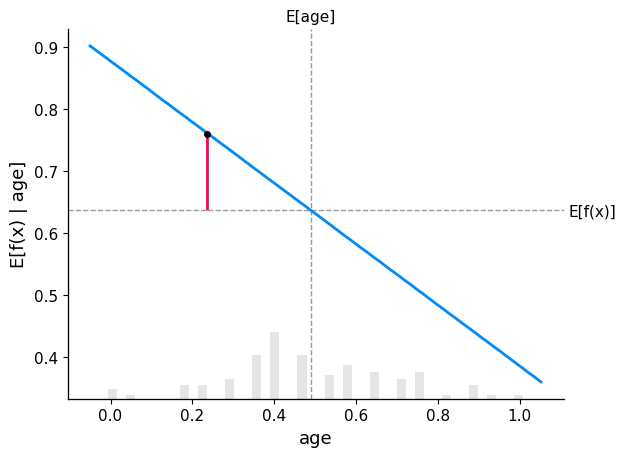

In [191]:
partial_dependence_plot('age', 0)

As the slope is negative, this indicates car prices decrease with increase in age.

#Shap Plots
Lets look at all features of the same sample.

shap.initjs() is a function from the shap library that initializes the JavaScript visualizations used to display the SHAP (SHapley Additive exPlanations) values. This function needs to be called before any SHAP visualization is displayed in a Jupyter Notebook or any other web-based environment. It loads the required JavaScript libraries and initializes the necessary components to render the visualizations.

In [192]:
shap.initjs()

This is a function that generates a SHAP summary plot for a given sample idx, showing the importance of each feature in predicting the output value for that particular sample. The function has an optional argument type, which determines the type of SHAP plot to generate.

In [193]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

The function returns a waterfall plot using SHAP values. This plot shows how each feature contributes to the difference between the predicted output for the selected sample and the expected value of the model. The plot starts at the expected value and shows how each feature moves the prediction up or down. The height of each bar indicates the magnitude of the impact, with blue indicating a positive impact and red indicating a negative impact.

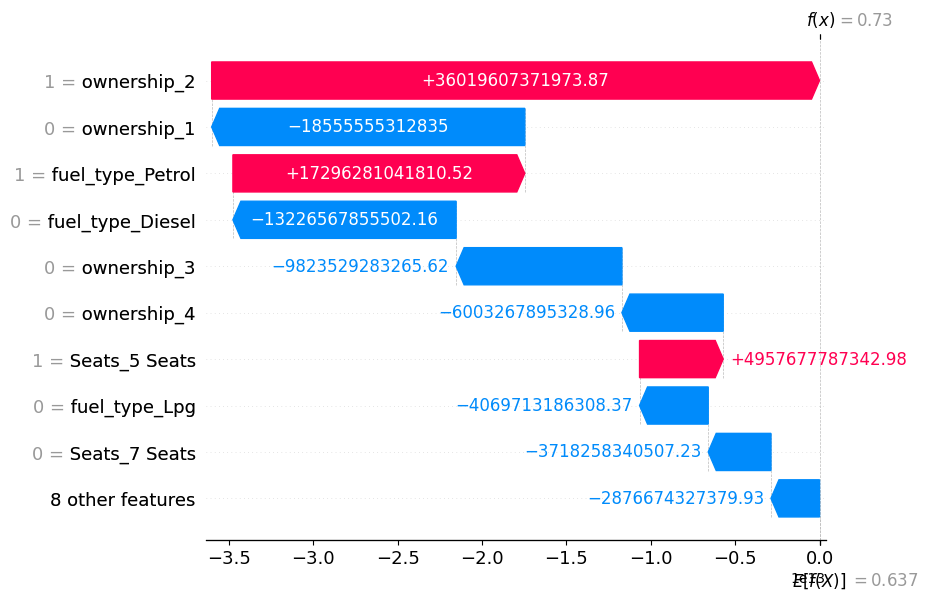

In [194]:
sample_feature_importance(0, 'waterfall')

The red and blue bars in the waterfall plot indicate the contribution of each feature to the model output. The red bars represent features that decrease the output value relative to the base value, while the blue bars represent features that increase the output value. The length of the bar corresponds to the magnitude of the feature's effect on the output, with longer bars indicating stronger effects. The cumulative effect of all features is shown at the bottom of the plot, indicating the final predicted output value.

sample_feature_importance(0, 'condensed') is a function call that generates a SHAP summary plot for the first sample in the test set. This plot shows the global feature importance values for all the features in the model for that particular sample.

In [195]:
sample_feature_importance(0, 'condensed')

#Feature Importance for model
Let's look at all samples together.

shap.plots.bar() is a function from the SHAP library that creates a bar plot showing the average absolute SHAP values for each feature in the dataset, sorted in descending order. The height of each bar represents the importance of the corresponding feature in the model, and the color represents the direction of its effect (blue for negative impact and red for positive impact).

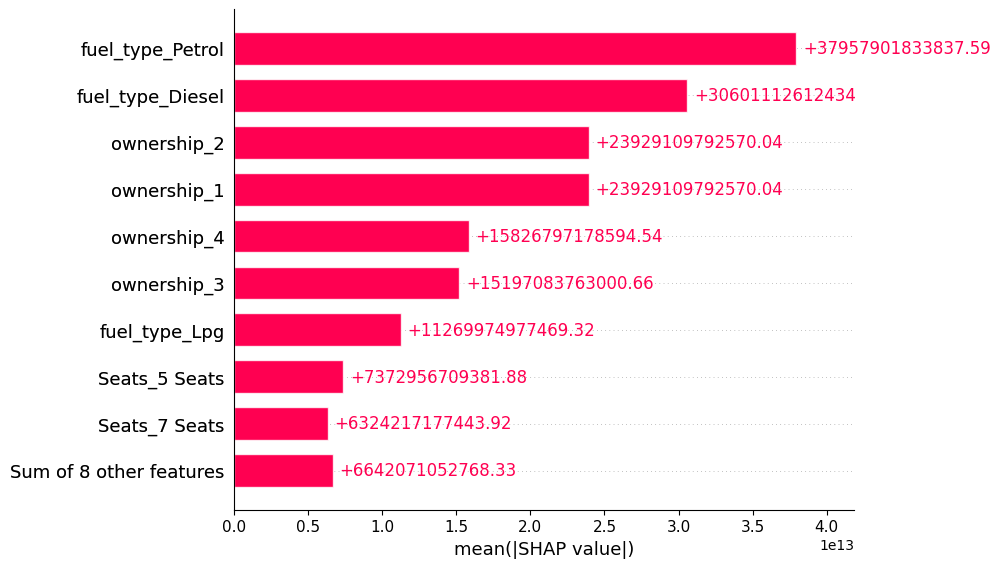

In [196]:
shap.plots.bar(shap_values)

Two most important features according to the LinearRegression model:

1.   manufacture (Year of manufacture)
2.   kms_driven (Kilometers driven till date)



shap.summary_plot is used to plot the SHAP values of all the features in a dataset. The plot displays a summary of the global importance of each feature based on their absolute SHAP values.

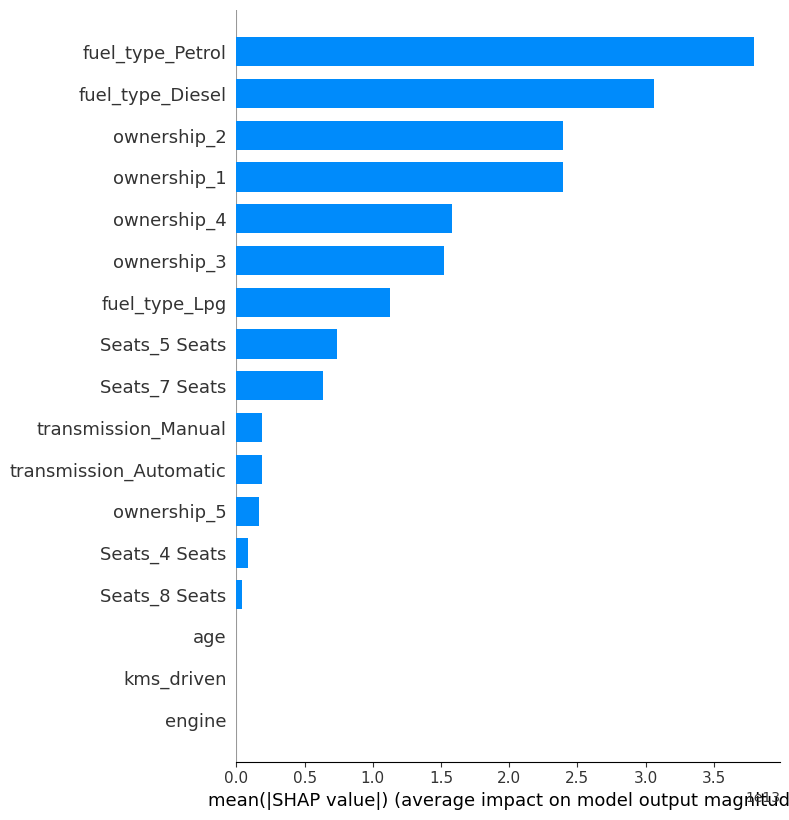

In [197]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

#Conclusion

Based on the analysis, we can conclude that the feature "age" has a negative impact on the predicted price of the car. In other words, as the "age" value increases, the predicted price of the car also tends to decrease. This is shown by the negative slope of the partial dependence plot for the "age" feature.

Furthermore, the SHAP analysis helps us identify which features have the most significant impact on the predicted price of the car. The bar plot of SHAP values indicates that the most important feature is "age", followed by "kms_driven", "engine". This information can be used to improve the accuracy of the pricing model by focusing on these key features during data collection and preprocessing.


Most important features:

1.   age
2.   kms_driven
3.   engine



#References


1. https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction/code
2. https://www.w3schools.com/python/pandas/
3. https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb


#License

MIT License

Copyright (c) 2023 Aashay Pawar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.